In [86]:
import pickle
import h5py as h5
import glob
import os

from IPython.display import HTML, display
from helper import hide_toggle
import matplotlib.pyplot as plt
import pandas as pd


import numpy as np
%config InlineBackend.figure_format='retina'

from helper import hide_toggle

import tensorsignatures as ts
# hide_toggle()


In [87]:
import matplotlib.colors as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors_dark = [cm.to_hex(plt.cm.tab20(i)) for i in range(0, 20, 2)]
colors_light = [cm.to_hex(plt.cm.tab20(i)) for i in range(1, 21, 2)]
tab_reordered = colors_dark + colors_light
cmp = ListedColormap(tab_reordered)

In [311]:
path = '/home/xchen@okta-oci.eitm.org/projects/tensorsignatures/tsdata_state002_029.h5'
snv = h5.File(path, 'r')['SNV'][()]
snv.shape

(3, 3, 16, 4, 2, 96, 122)

In [314]:
coding = snv[2].sum(axis=(0,1,3,4,5))
# template = snv[1].sum(axis=(0,1,2,4))

In [317]:
snv[0].shape

(3, 16, 4, 2, 96, 122)

In [ ]:
fig, axes = plt.subplots(2, 2, sharey=True)
axes[0, 0].bar(np.arange(96), coding, color=ts.DARK_PALETTE)
axes[0, 0].set_title("Pooled coding strand mutations")
axes[0, 1].bar(np.arange(96), template, color=ts.DARK_PALETTE)
axes[0, 1].set_title("Pooled template strand mutations")
axes[1, 0].bar(np.arange(96), leading, color=ts.DARK_PALETTE)
axes[1, 0].set_title("Pooled leading strand mutations")
axes[1, 1].bar(np.arange(96), lagging, color=ts.DARK_PALETTE)
axes[1, 1].set_title("Pooled lagging strand mutations")
plt.tight_layout()
plt.show()

In [318]:
%matplotlib inline
base_path = '/data/xchen/STATE_analyses_data'
input_vcf_paths = glob.glob(os.path.join(base_path, '*', 'results/variant_calling/clairs', '*', '*.ann.filtered.vcf.gz'))
# input_vcf_paths = [p for p in input_vcf_paths if int(p.split('/')[4].split('_')[1]) in range(0, 28) ]
input_vcf_paths.sort()
patient_ids = [vcf_path.split('/')[-2] for vcf_path in input_vcf_paths]

input_vcf_failed_paths = glob.glob(os.path.join(base_path, '*', 'results/variant_calling/clairs', '*', '*.ann.failed_filter.vcf.gz'))
# input_vcf_paths = [p for p in input_vcf_paths if int(p.split('/')[4].split('_')[1]) in range(0, 28) ]
input_vcf_failed_paths.sort()
patient_failed_ids = [vcf_path.split('/')[-2] + "_failed_filter" for vcf_path in input_vcf_failed_paths]


input_fp_vcf_paths = glob.glob(os.path.join(base_path, '*', 'results/variant_calling/clairs', 'HG002_*', 'fp', '0000.vcf'))
# input_fp_vcf_paths = [p for p in input_fp_vcf_paths if int(p.split('/')[4].split('_')[1]) in range(0, 28) ]
fp_ids = [vcf_path.split('/')[-3].split('_')[0] + '_FP' for vcf_path in input_fp_vcf_paths]
tp_ids =  [vcf_path.split('/')[-3].split('_')[0] + '_TP' for vcf_path in input_fp_vcf_paths]

input_fp_pileup_vcf_paths = glob.glob(os.path.join(base_path, '*', 'results/variant_calling/clairs', 'HG002_*', 'fp_pileup', '0000.vcf'))

fp_pileup_ids = [vcf_path.split('/')[-3].split('_')[0] + '_FP_pileup' for vcf_path in input_fp_pileup_vcf_paths]



input_vcf_fail_paths = glob.glob(os.path.join(base_path, '*', 'results/variant_calling/clairs', '*', '*.ann.failed_filter.vcf.gz'))
input_vcf_fail_paths.sort()
patient_ids_failed = [vcf_path.split('/')[-2] + '_failed_filter' for vcf_path in input_vcf_fail_paths]


HG002_TP    3.876062e+06
HG002_TP    3.700864e+06
HG002_TP    3.838904e+06
HG002_TP    3.695059e+06
HG002_TP    3.769807e+06
HG002_TP    3.591618e+06
HG002_TP    2.908449e+06
HG002_TP    3.649052e+06
HG002_TP    2.864680e+06
HG002_TP    3.262324e+06
HG002_TP    3.244008e+06
HG002_TP    3.796254e+06
HG002_TP    3.828121e+06
HG002_TP    3.559761e+06
HG002_TP    3.792298e+06
HG002_TP    3.696380e+06
HG002_TP    3.813828e+06
HG002_TP    3.858114e+06
HG002_TP    3.822826e+06
HG002_TP    3.846719e+06
HG002_TP    3.792794e+06
HG002_TP    3.890964e+06
HG002_TP    3.854821e+06
HG002_TP    3.874402e+06
HG002_TP    3.868009e+06
HG002_TP    3.810098e+06
HG002_TP    3.876463e+06
HG002_FP    7.564868e+05
HG002_FP    8.585398e+05
HG002_FP    7.596497e+05
HG002_FP    9.658546e+05
HG002_FP    9.071991e+05
HG002_FP    9.491948e+05
HG002_FP    9.974936e+05
HG002_FP    1.041201e+06
HG002_FP    1.014902e+06
HG002_FP    9.825111e+05
HG002_FP    1.010287e+06
HG002_FP    8.626104e+05
HG002_FP    8.108983e+05


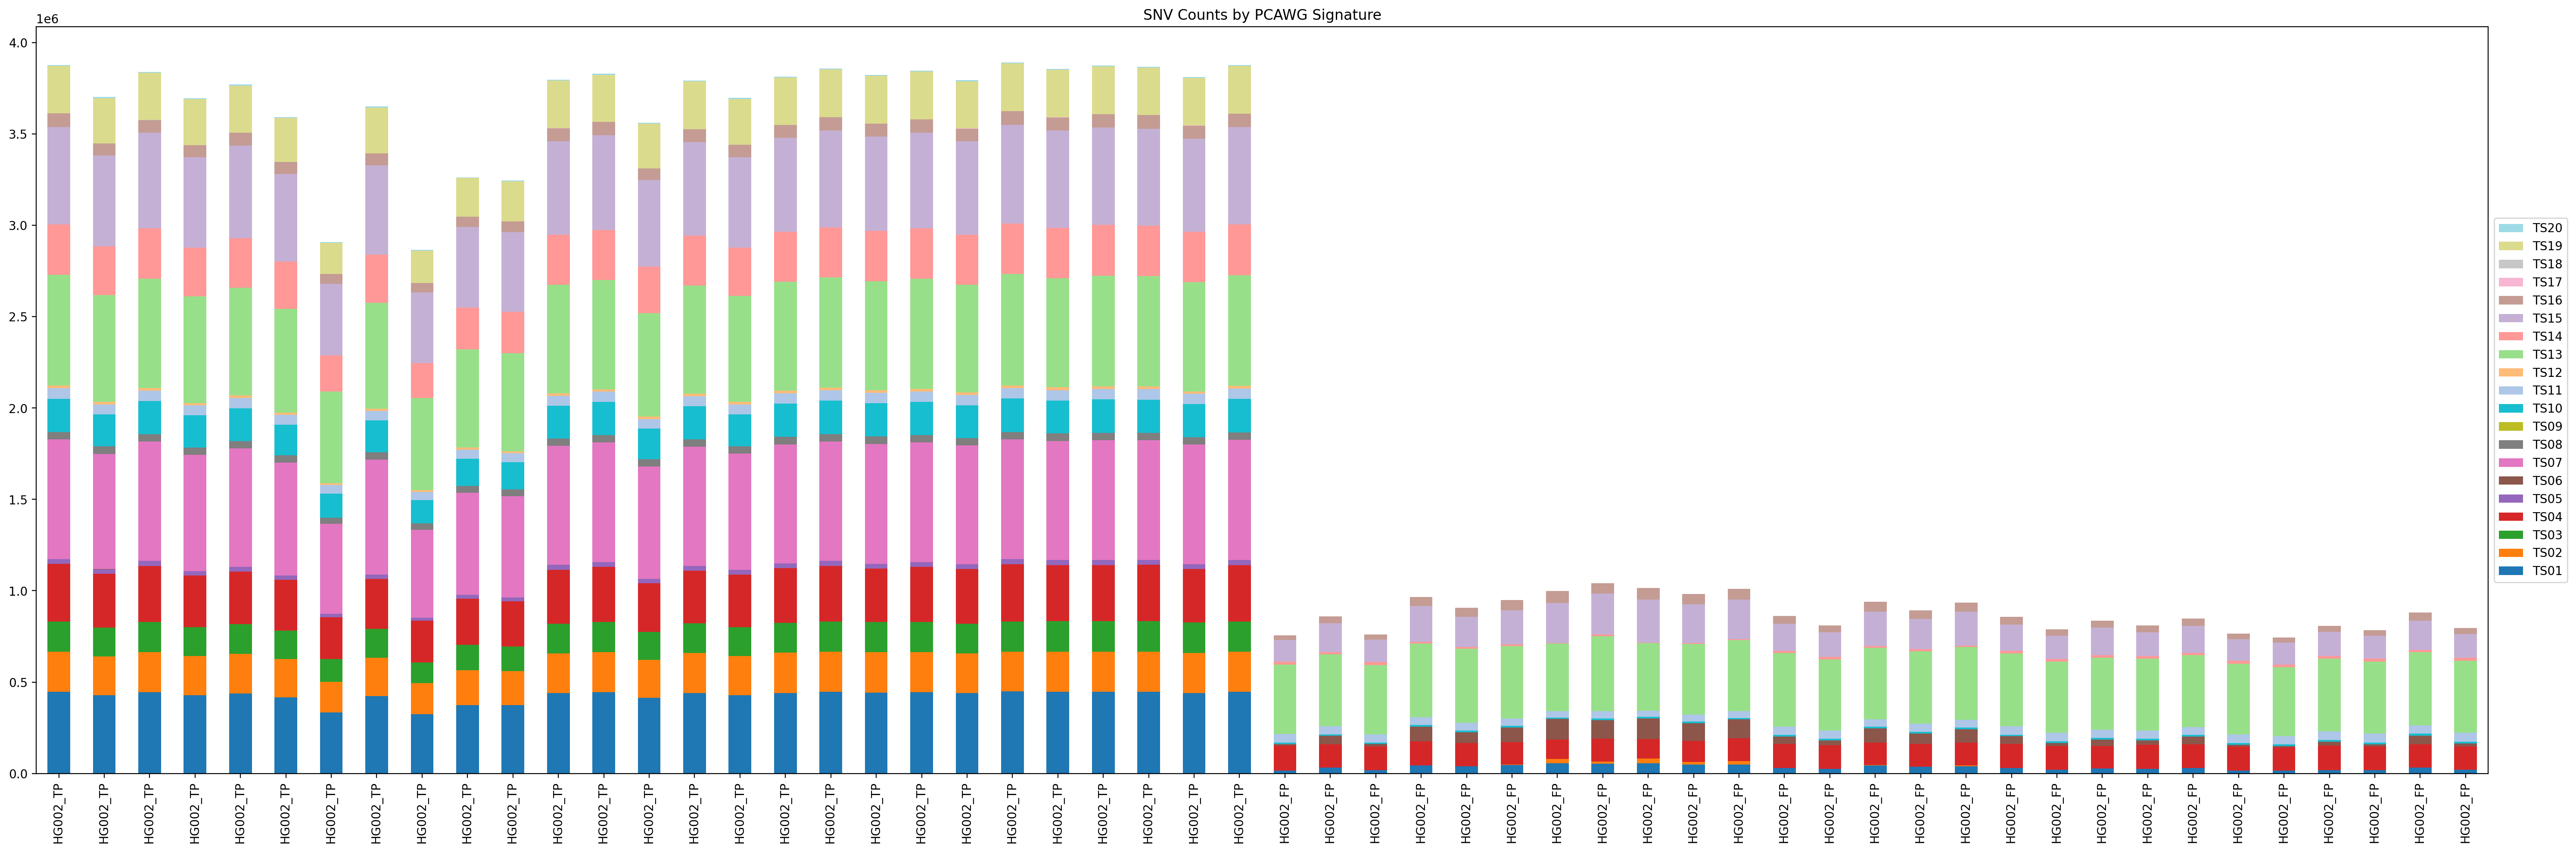

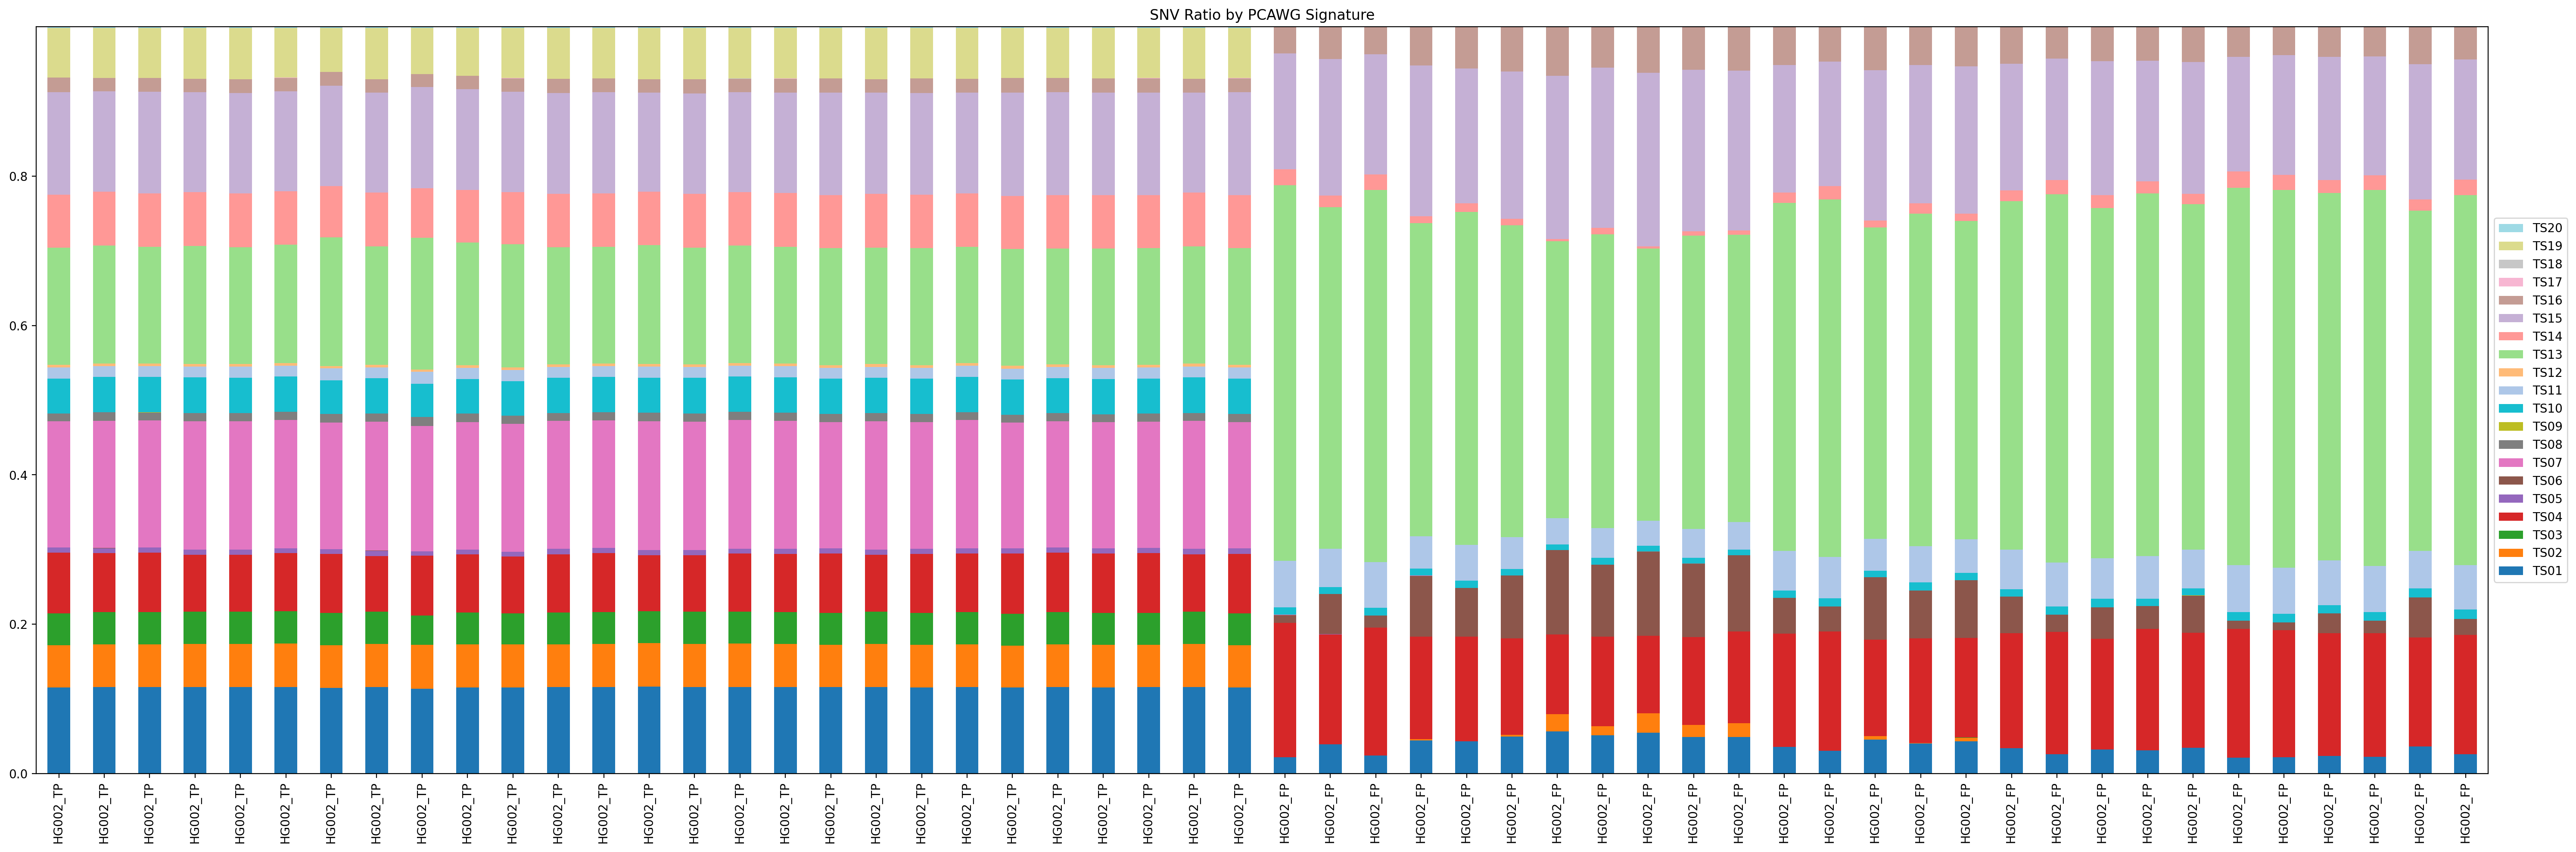

In [321]:
refit_path = '/home/xchen@okta-oci.eitm.org/projects/tensorsignatures/refit_hg002_tpfp.pkl'
init = ts.load_dump(refit_path)
rows = [f'TS{n+1:02}' for n in range(init.rank)]
ids =  tp_ids + fp_ids 
exposure_df = pd.DataFrame(init.E.reshape(init.rank, init.sample_indices.shape[0]), columns = ids, index = rows).T
exposure_df_norm = exposure_df.divide(exposure_df.sum(axis=1), axis=0)
print(exposure_df.sum(axis=1).head())
exposure_df.plot.bar(stacked=True, fontsize=10, figsize=(30,10), title='SNV Counts by PCAWG Signature', cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()
exposure_df_norm.plot.bar(stacked=True, figsize=(30,10), title='SNV Ratio by PCAWG Signature', fontsize=10, cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()

EIBS-001TE_02818_1_2_20220916      4.146045e+04
EIBS-001TF_02819_1_4_20220916      3.770264e+04
EIBS-001TG_02820_1_4_20220916      3.710355e+04
EIBS-001TH_02821_1_2_20220916      3.313784e+04
EIBS-001TA_02814_1_1_1_20220930    3.322341e+04
                                       ...     
HG002_FP_pileup                    2.979880e+06
HG002_FP_pileup                    1.707562e+06
HG002_FP_pileup                    1.756973e+06
HG002_FP_pileup                    2.302420e+06
HG002_FP_pileup                    2.023337e+06
Length: 172, dtype: float32


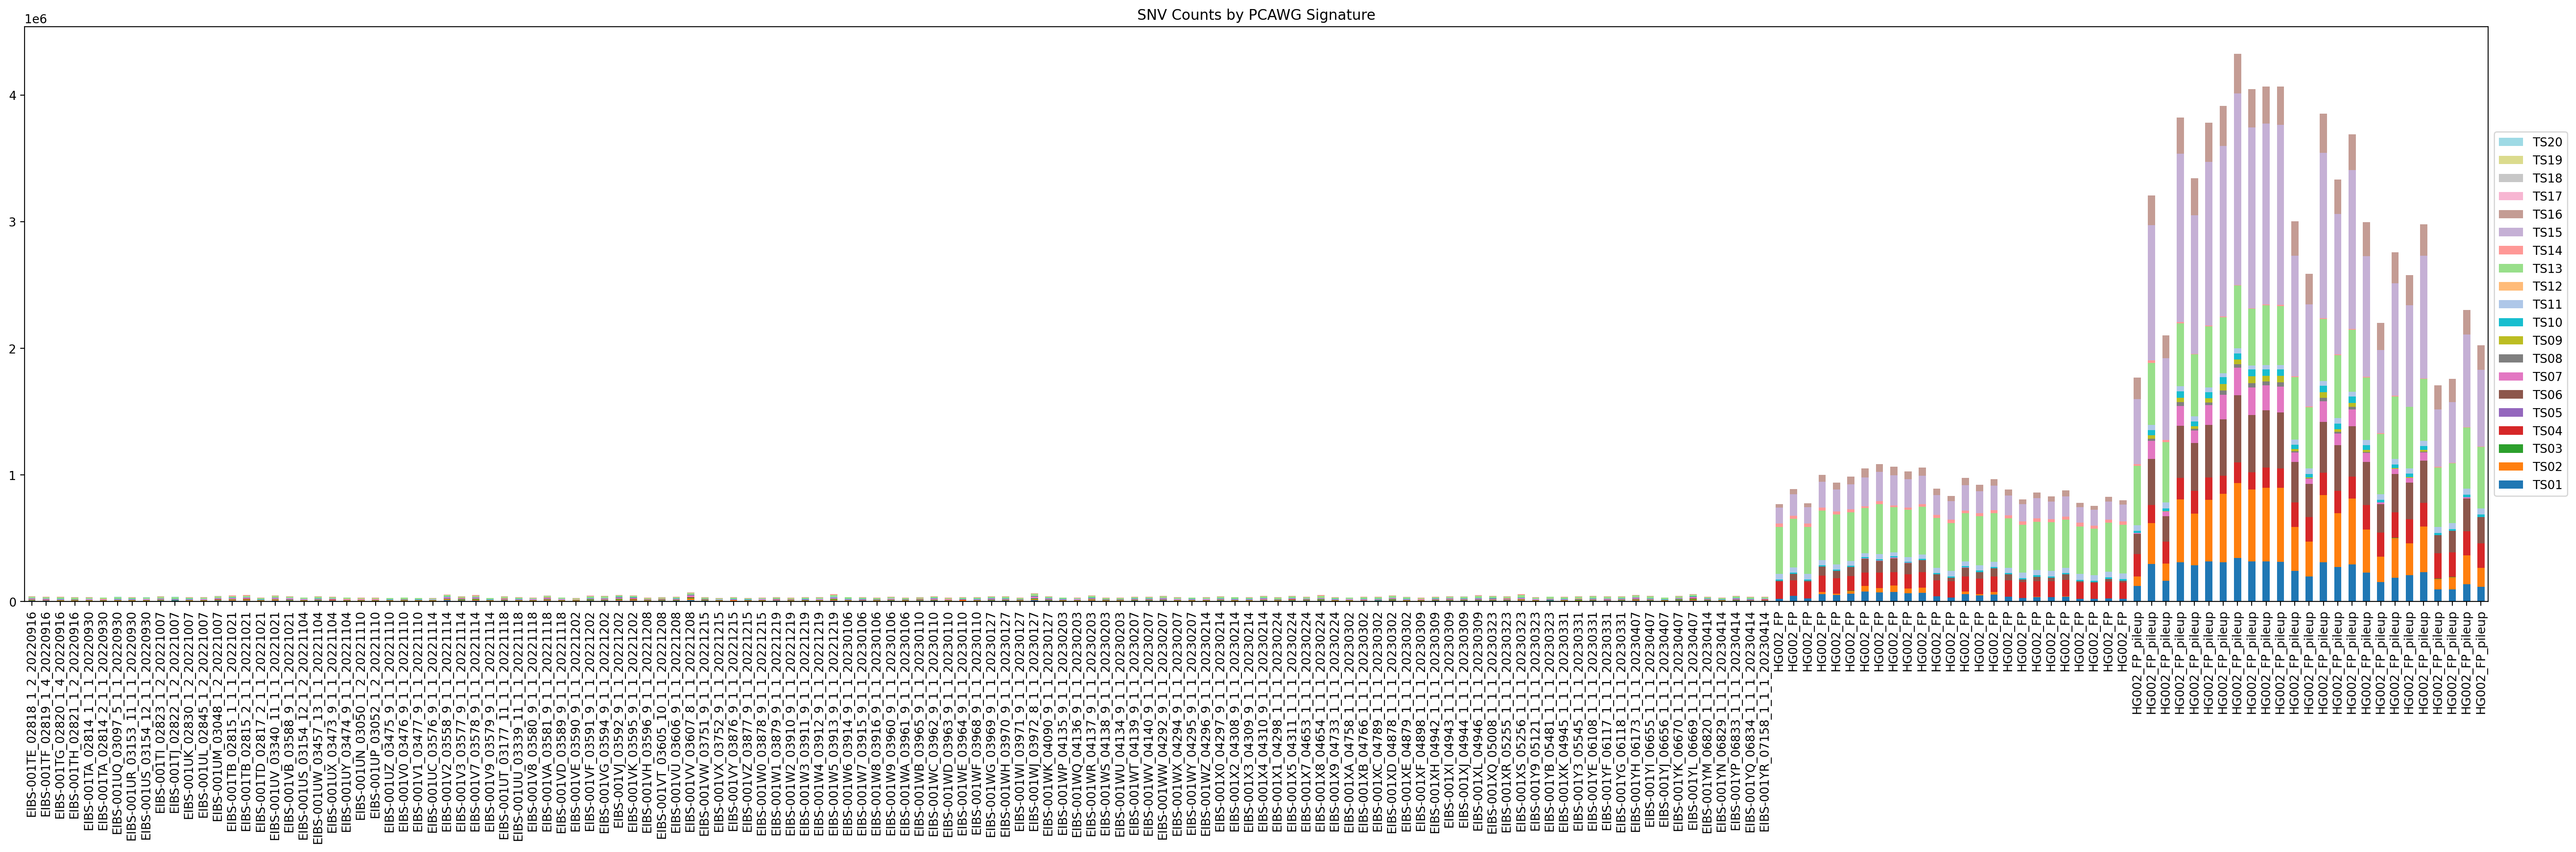

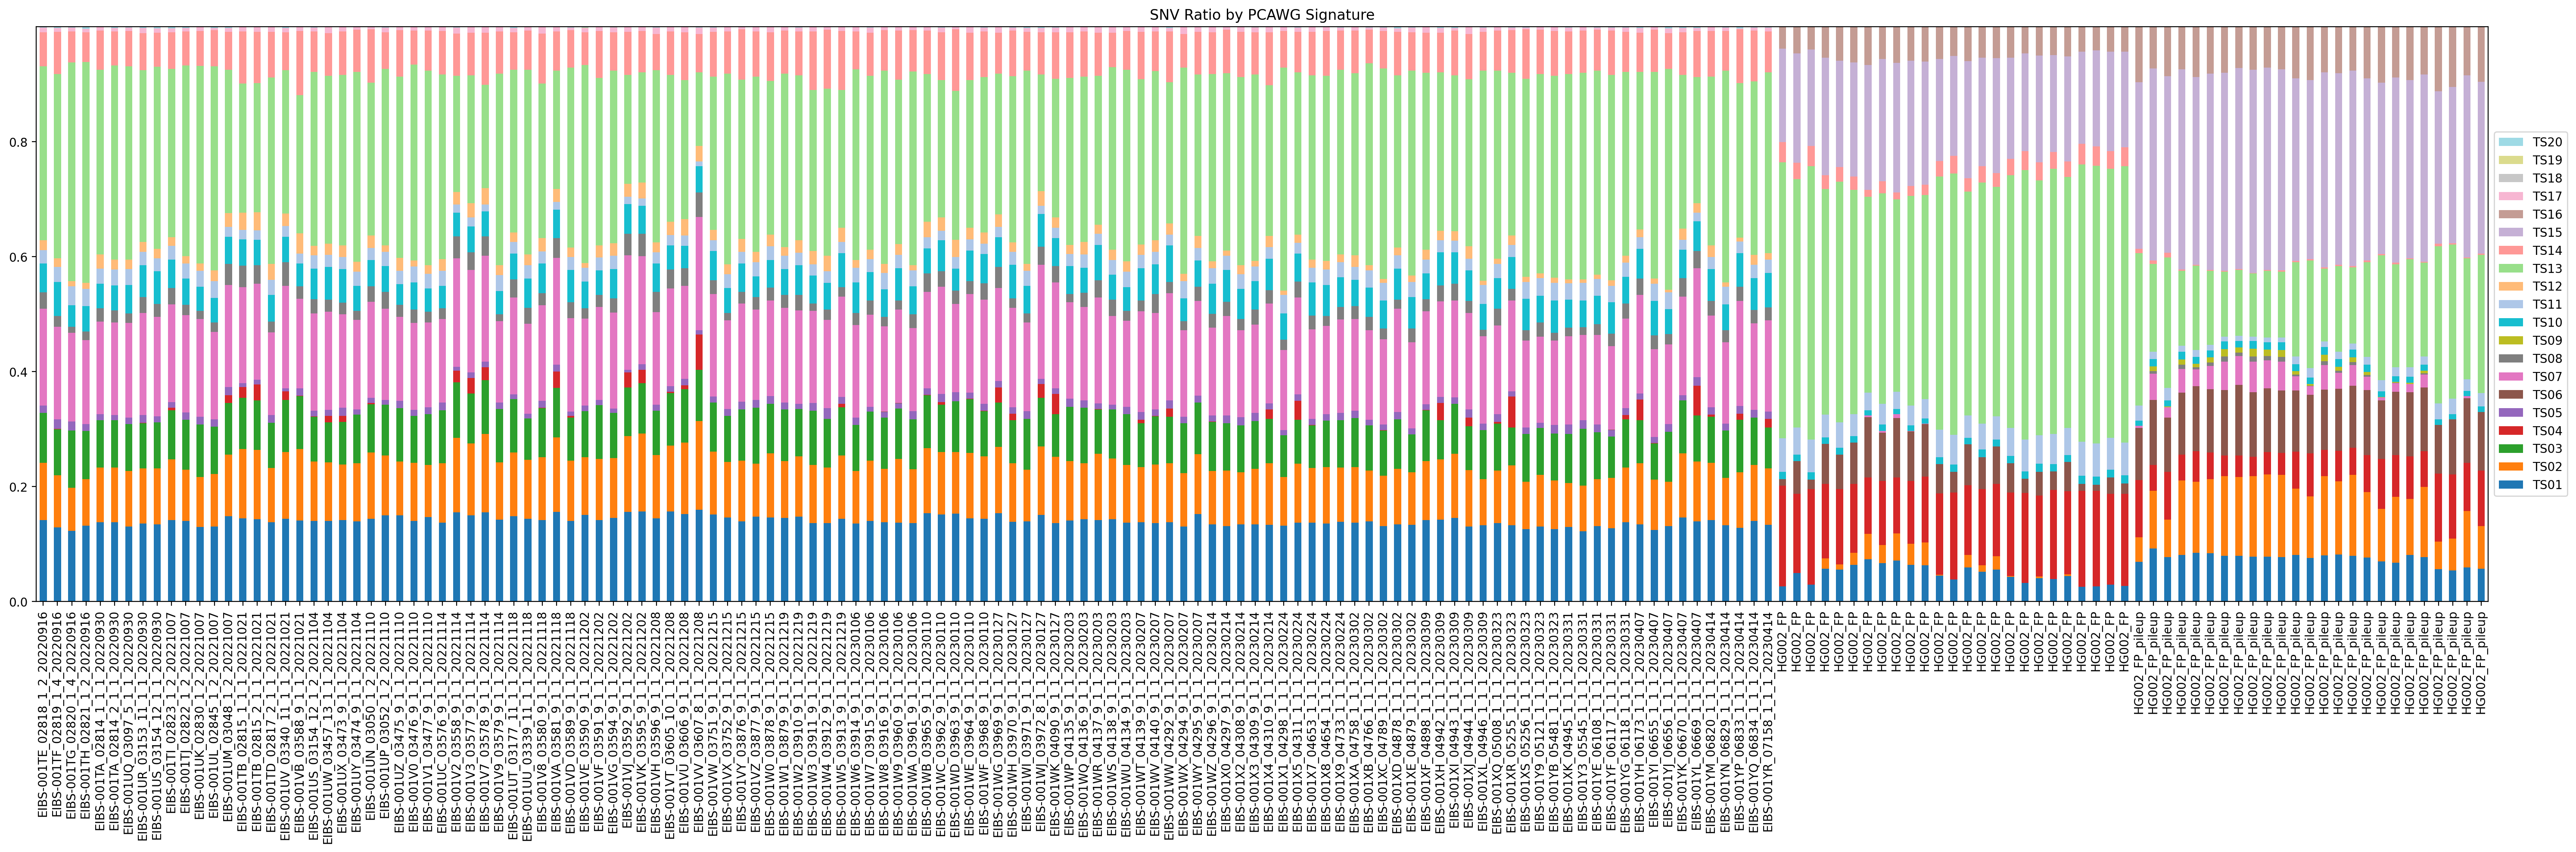

In [280]:
refit_path = '/home/xchen@okta-oci.eitm.org/projects/tensorsignatures/refit_state002_029_fp_fp_pileup.pkl'
init = ts.load_dump(refit_path)
rows = [f'TS{n+1:02}' for n in range(init.rank)]
ids =  patient_ids + fp_ids + fp_pileup_ids
exposure_df = pd.DataFrame(init.E.reshape(init.rank, init.sample_indices.shape[0]), columns = ids, index = rows).T
exposure_df_norm = exposure_df.divide(exposure_df.sum(axis=1), axis=0)
print(exposure_df.sum(axis=1))
exposure_df.plot.bar(stacked=True, fontsize=10, figsize=(30,10), title='SNV Counts by PCAWG Signature', cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()
exposure_df_norm.plot.bar(stacked=True, figsize=(30,10), title='SNV Ratio by PCAWG Signature', fontsize=10, cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()

EIBS-001TE_02818_1_2_20220916      43569.816406
EIBS-001TF_02819_1_4_20220916      39478.101562
EIBS-001TG_02820_1_4_20220916      38653.320312
EIBS-001TH_02821_1_2_20220916      34634.230469
EIBS-001TA_02814_1_1_1_20220930    34909.839844
                                       ...     
EIBS-001YM_06820_1_1_1_20230414    40605.960938
EIBS-001YN_06829_1_1_1_20230414    31974.144531
EIBS-001YP_06833_1_1_1_20230414    47006.261719
EIBS-001YQ_06834_1_1_1_20230414    37862.238281
EIBS-001YR_07158_1_1_1_20230414    38861.933594
Length: 122, dtype: float32


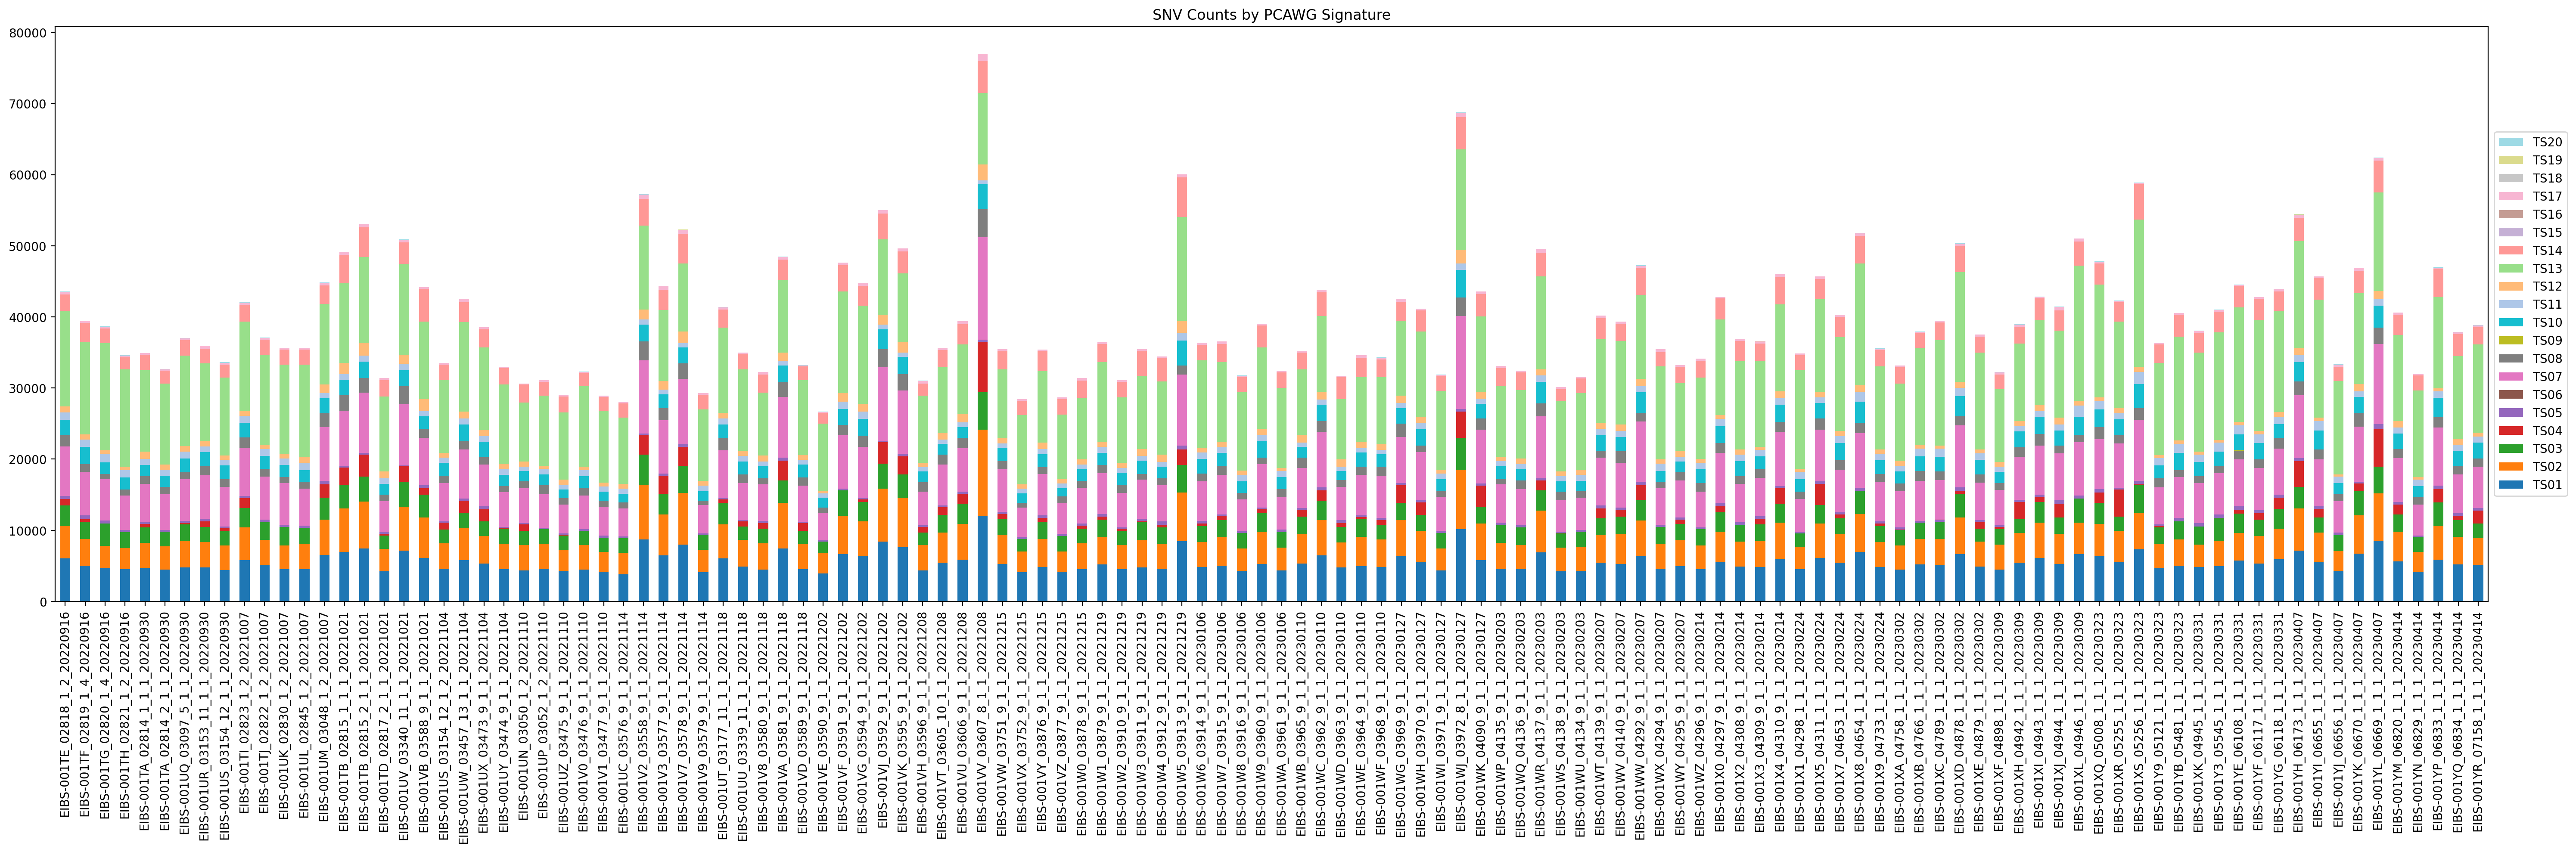

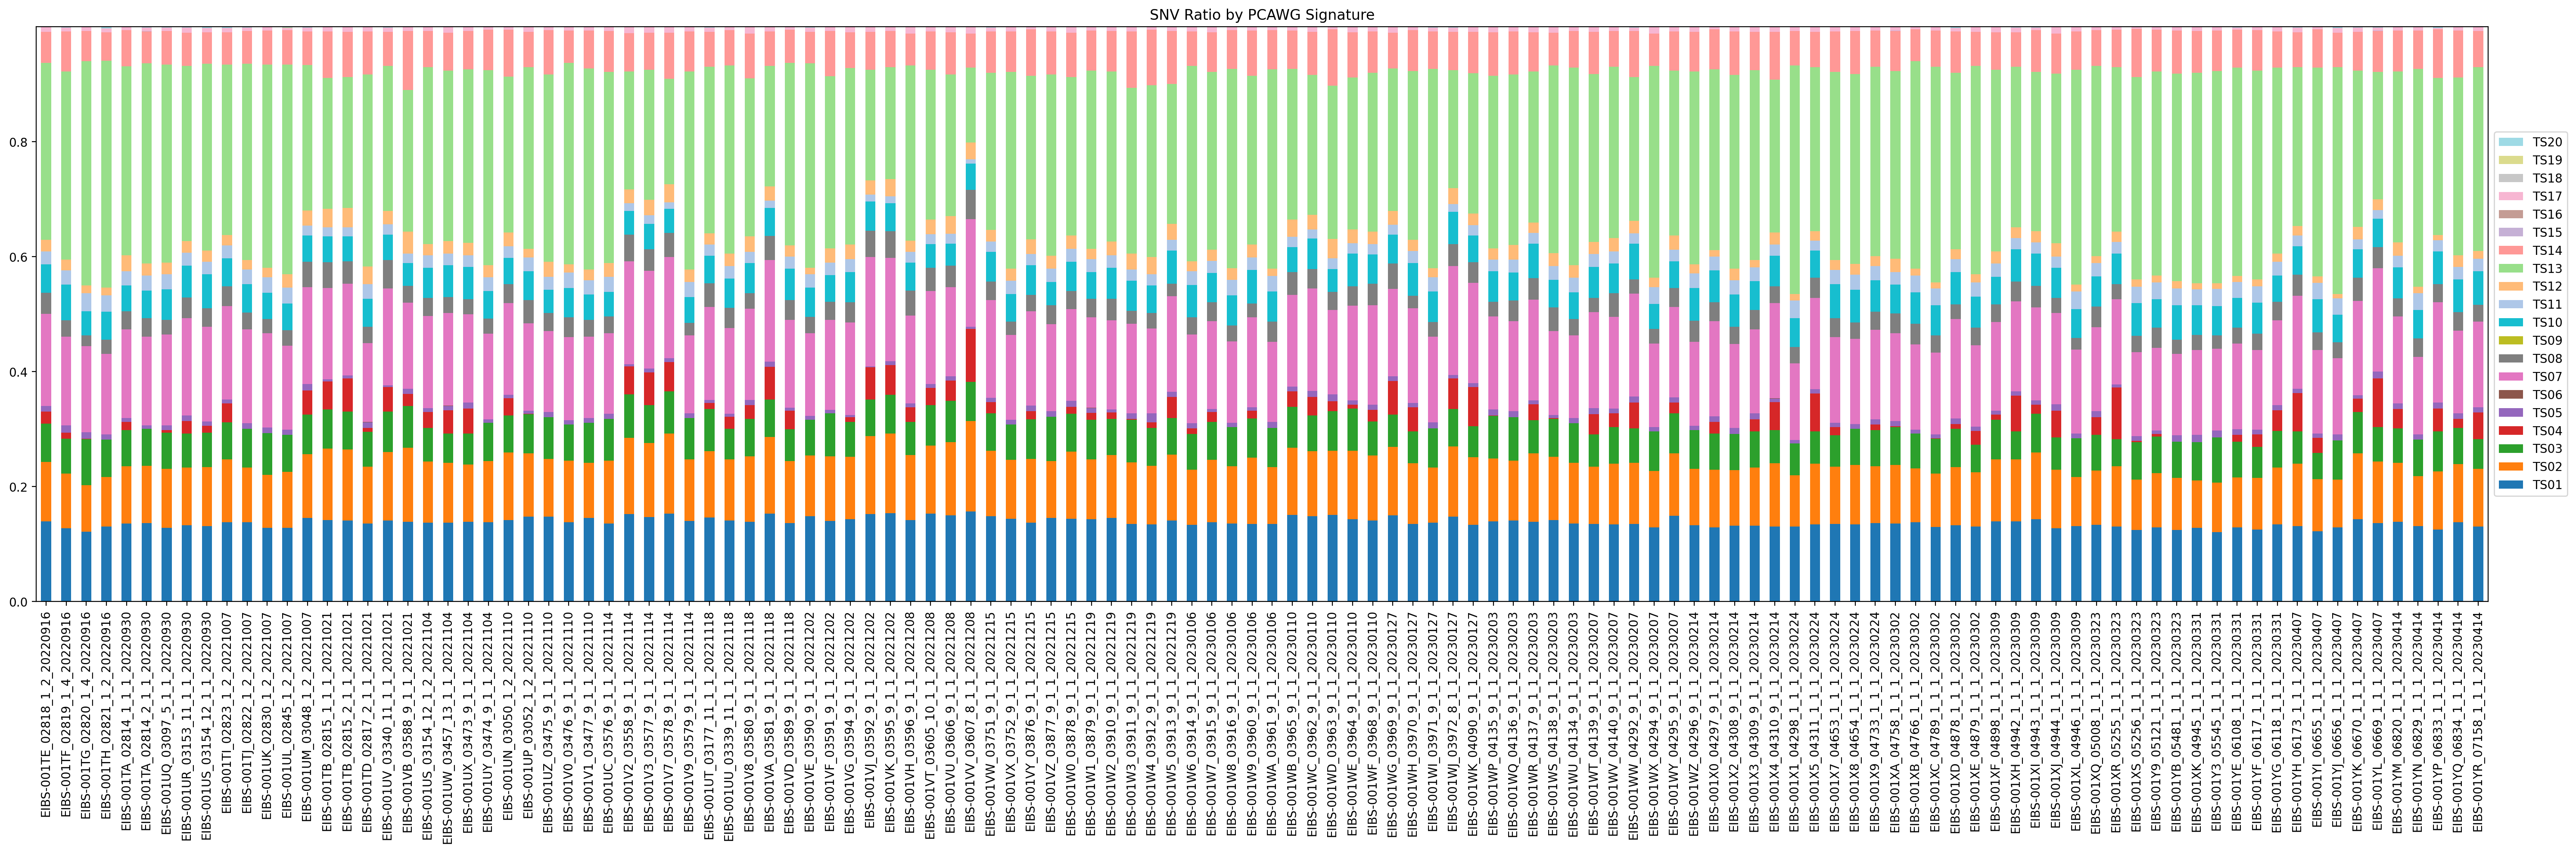

In [274]:
refit_path = '/home/xchen@okta-oci.eitm.org/projects/tensorsignatures/refit_state002_029.pkl'
init = ts.load_dump(refit_path)
rows = [f'TS{n+1:02}' for n in range(init.rank)]
ids = patient_ids #+ fp_ids + fp_pileup_ids
exposure_df = pd.DataFrame(init.E.reshape(init.rank, init.sample_indices.shape[0]), columns = ids, index = rows).T
exposure_df_norm = exposure_df.divide(exposure_df.sum(axis=1), axis=0)
print(exposure_df.sum(axis=1))
exposure_df.plot.bar(stacked=True, fontsize=10, figsize=(30,10), title='SNV Counts by PCAWG Signature', cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()
exposure_df_norm.plot.bar(stacked=True, figsize=(30,10), title='SNV Ratio by PCAWG Signature', fontsize=10, cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()

In [285]:
exposure_fail_filter_df_norm.describe()

TS01        TS02        TS03        TS04        TS05        TS06  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.144287    0.096766    0.073275    0.013062    0.009083    0.000046   
std      0.007753    0.009776    0.015561    0.012900    0.002124    0.000049   
min      0.121842    0.071707    0.053050    0.000002    0.003208    0.000001   
25%      0.138698    0.092538    0.058403    0.000055    0.007780    0.000011   
50%      0.147121    0.094959    0.070084    0.013149    0.008239    0.000029   
75%      0.149459    0.099476    0.088019    0.022529    0.010538    0.000065   
max      0.158849    0.150957    0.102952    0.070205    0.016821    0.000268   

             TS07        TS08          TS09        TS10        TS11  \
count  244.000000  244.000000  2.440000e+02  244.000000  244.000000   
mean     0.169694    0.027256  6.702730e-06    0.052558    0.022751   
std      0.018448    0.005979  5.649596e-06    0.005762    0.003935   
min      0.131000    0.011397  3.895203e-07    0.034937    0.008742   
25%      0.152747    0.025290  2.954279e-06    0.049251    0.020570   
50%      0.179752    0.027155  4.990986e-06    0.054242    0.021786   
75%      0.185663    0.028741  8.574326e-06    0.056050    0.024415   
max      0.196680    0.053133  2.604870e-05    0.064392    0.034593   

             TS12        TS13        TS14          TS15          TS16  \
count  244.000000  244.000000  244.000000  2.440000e+02  2.440000e+02   
mean     0.011121    0.271650    0.073993  2.688664e-05  5.706340e-06   
std      0.006338    0.050201    0.007746  4.190563e-05  8.091321e-06   
min      0.002220    0.137985    0.051458  2.816586e-07  1.230809e-07   
25%      0.006242    0.236245    0.070934  2.320439e-06  7.835628e-07   
50%      0.007897    0.250758    0.073316  7.803751e-06  2.615774e-06   
75%      0.015405    0.311083    0.076430  3.532192e-05  6.563761e-06   
max      0.033440    0.397619    0.110673  2.771129e-04  4.141690e-05   

             TS17          TS18          TS19        TS20  
count  244.000000  2.440000e+02  2.440000e+02  244.000000  
mean     0.003630  8.139160e-06  2.895585e-02    0.001825  
std      0.003030  6.590093e-06  2.991628e-02    0.000908  
min      0.000058  7.120738e-07  9.435790e-07    0.000002  
25%      0.000852  3.527931e-06  1.520303e-05    0.001240  
50%      0.002214  6.230019e-06  4.408131e-04    0.002187  
75%      0.006286  1.096094e-05  5.894944e-02    0.002519  
max      0.010814  3.630630e-05  7.804363e-02    0.003637

EIBS-001TE_02818_1_2_20220916                    4.053497e+04
EIBS-001TF_02819_1_4_20220916                    3.703397e+04
EIBS-001TG_02820_1_4_20220916                    3.659247e+04
EIBS-001TH_02821_1_2_20220916                    3.263846e+04
EIBS-001TA_02814_1_1_1_20220930                  3.268330e+04
                                                     ...     
EIBS-001YM_06820_1_1_1_20230414_failed_filter    1.143346e+06
EIBS-001YN_06829_1_1_1_20230414_failed_filter    1.165303e+06
EIBS-001YP_06833_1_1_1_20230414_failed_filter    1.187150e+06
EIBS-001YQ_06834_1_1_1_20230414_failed_filter    1.120791e+06
EIBS-001YR_07158_1_1_1_20230414_failed_filter    1.143111e+06
Length: 244, dtype: float32


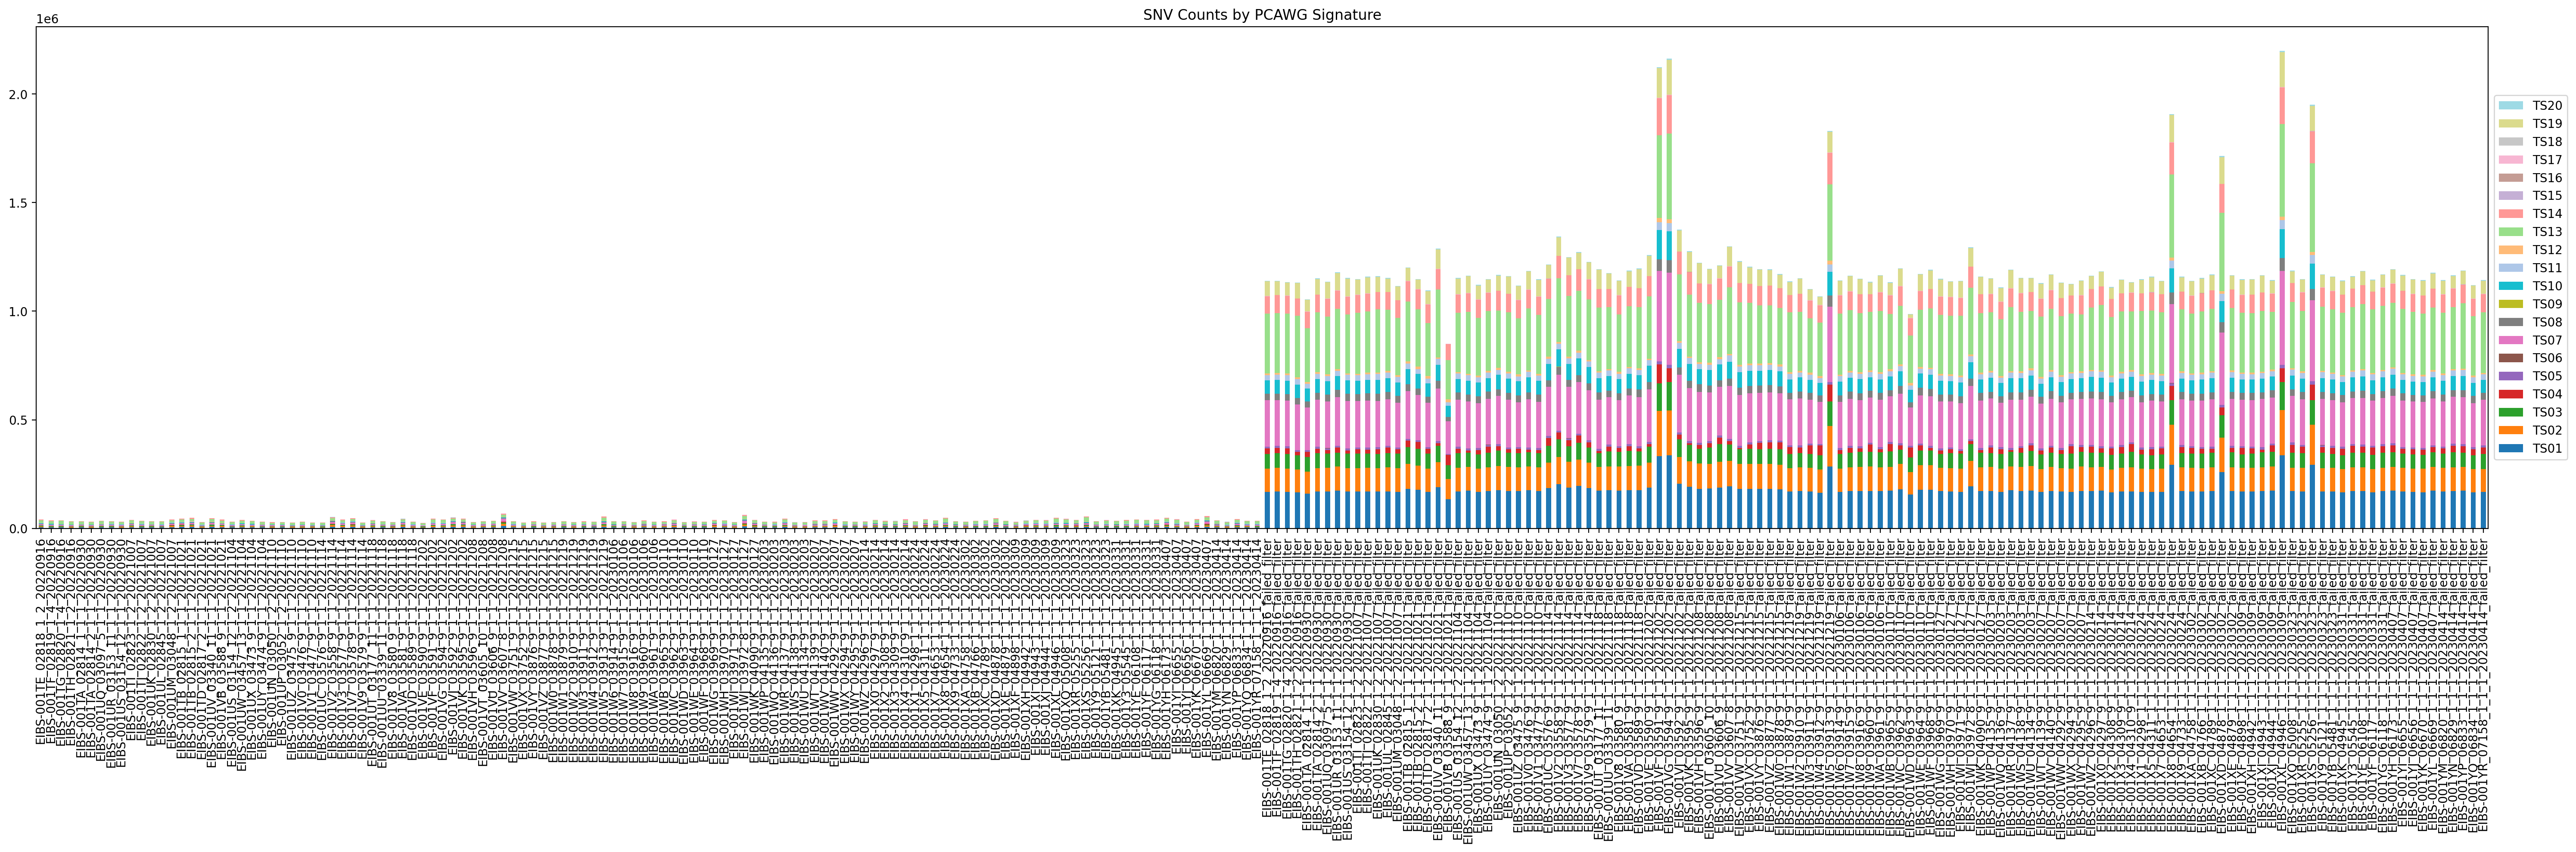

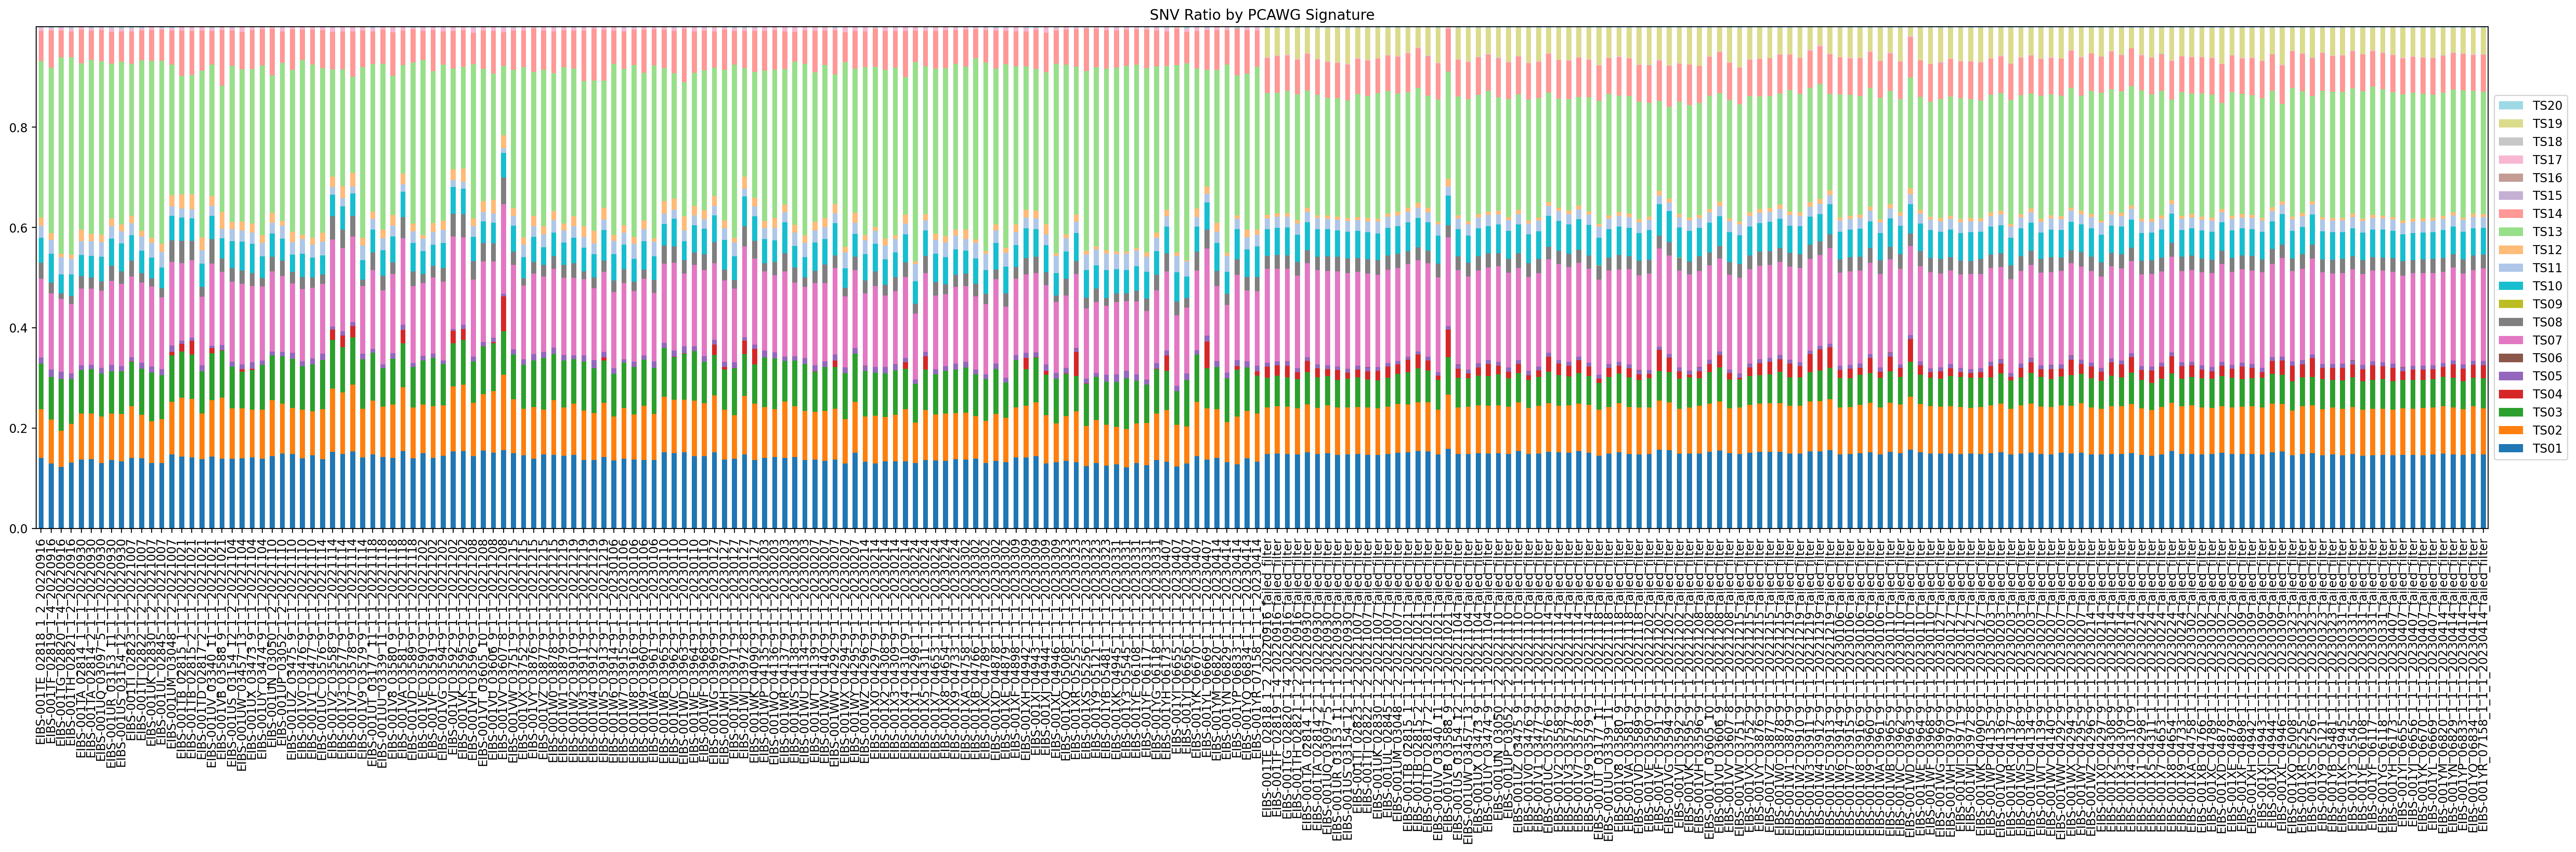

In [284]:
refit_path = '/home/xchen@okta-oci.eitm.org/projects/tensorsignatures/refit_state002_029_filtered_failed.pkl'
init = ts.load_dump(refit_path)
rows = [f'TS{n+1:02}' for n in range(init.rank)]
ids = patient_ids + patient_failed_ids
exposure_fail_filter_df = pd.DataFrame(init.E.reshape(init.rank, init.sample_indices.shape[0]), columns = ids, index = rows).T
exposure_fail_filter_df_norm = exposure_fail_filter_df.divide(exposure_fail_filter_df.sum(axis=1), axis=0)
print(exposure_fail_filter_df.sum(axis=1))
exposure_fail_filter_df.plot.bar(stacked=True, fontsize=10, figsize=(30,10), title='SNV Counts by PCAWG Signature', cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()
exposure_fail_filter_df_norm.plot.bar(stacked=True, figsize=(30,10), title='SNV Ratio by PCAWG Signature', fontsize=10, cmap=cmp).legend(loc='center left',bbox_to_anchor=(1.0, 0.5), reverse=True)
plt.tight_layout()

In [286]:
patient_exposures = exposure_df.loc[exposure_df.index.str.startswith('EIBS'),:]
hg002_exposures = exposure_df.loc[exposure_df.index.str.startswith('HG002'),:]
patient_fail_filter_exposures = exposure_fail_filter_df.loc[exposure_fail_filter_df.index.str.endswith('failed_filter'),:]

In [288]:
patient_norm_exposures = exposure_df_norm.loc[exposure_df_norm.index.str.startswith('EIBS'),:]
hg002_norm_exposures = exposure_df_norm.loc[exposure_df_norm.index.str.startswith('HG002'),:]
patient_norm_fail_filter_exposures = exposure_fail_filter_df_norm.loc[exposure_fail_filter_df_norm.index.str.endswith('failed_filter')]

In [289]:
exposures_all_groups = pd.concat([patient_exposures, hg002_exposures, patient_fail_filter_exposures], axis=0)
exposures_norm_all_groups = pd.concat([patient_norm_exposures, hg002_norm_exposures, patient_norm_fail_filter_exposures], axis=0)

[0.7372293  0.21489778]


Text(0.5, 1.0, 'PCA of signatures exposures raw counts')

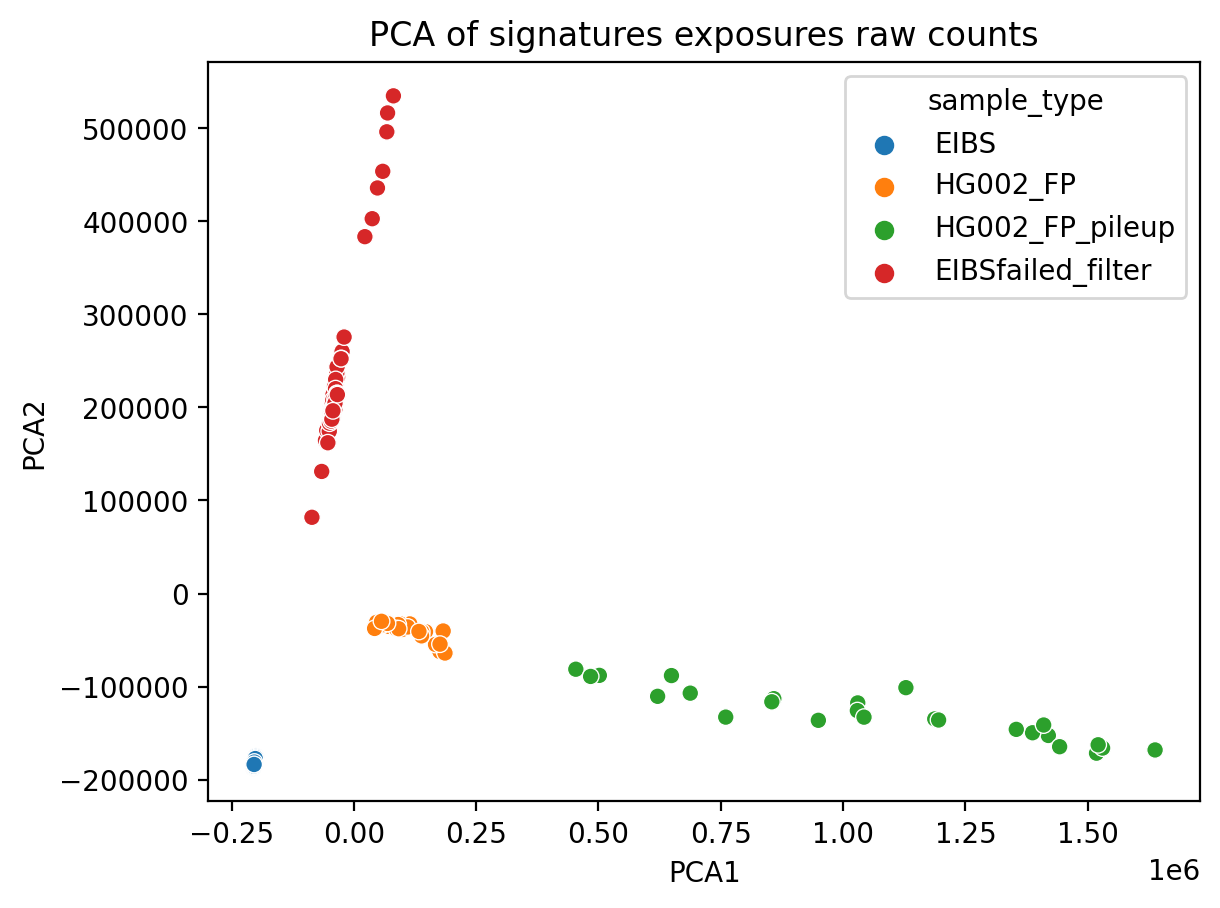

In [290]:
from sklearn.decomposition import PCA
import seaborn as sns

exposures_pca = exposures_all_groups.copy(deep=True)
pca = PCA(n_components=2)
components = pca.fit_transform(exposures_pca)
print(pca.explained_variance_ratio_)
exposures_pca['PCA1'] = components[:,0]
exposures_pca['PCA2'] = components[:, 1]
exposures_pca['ID'] = exposures_pca.index
suffix = ['failed_filter' if s.endswith('failed_filter') else "" for s in exposures_pca.ID]
exposures_pca['sample_type'] = exposures_pca.ID.str.rsplit('-', expand=True)[0] + suffix
sns.scatterplot(data=exposures_pca, x='PCA1', y='PCA2', hue='sample_type')
plt.title('PCA of signatures exposures raw counts')

[0.6907088  0.24366316]


Text(0.5, 1.0, 'PCA of signatures exposures normlaized')

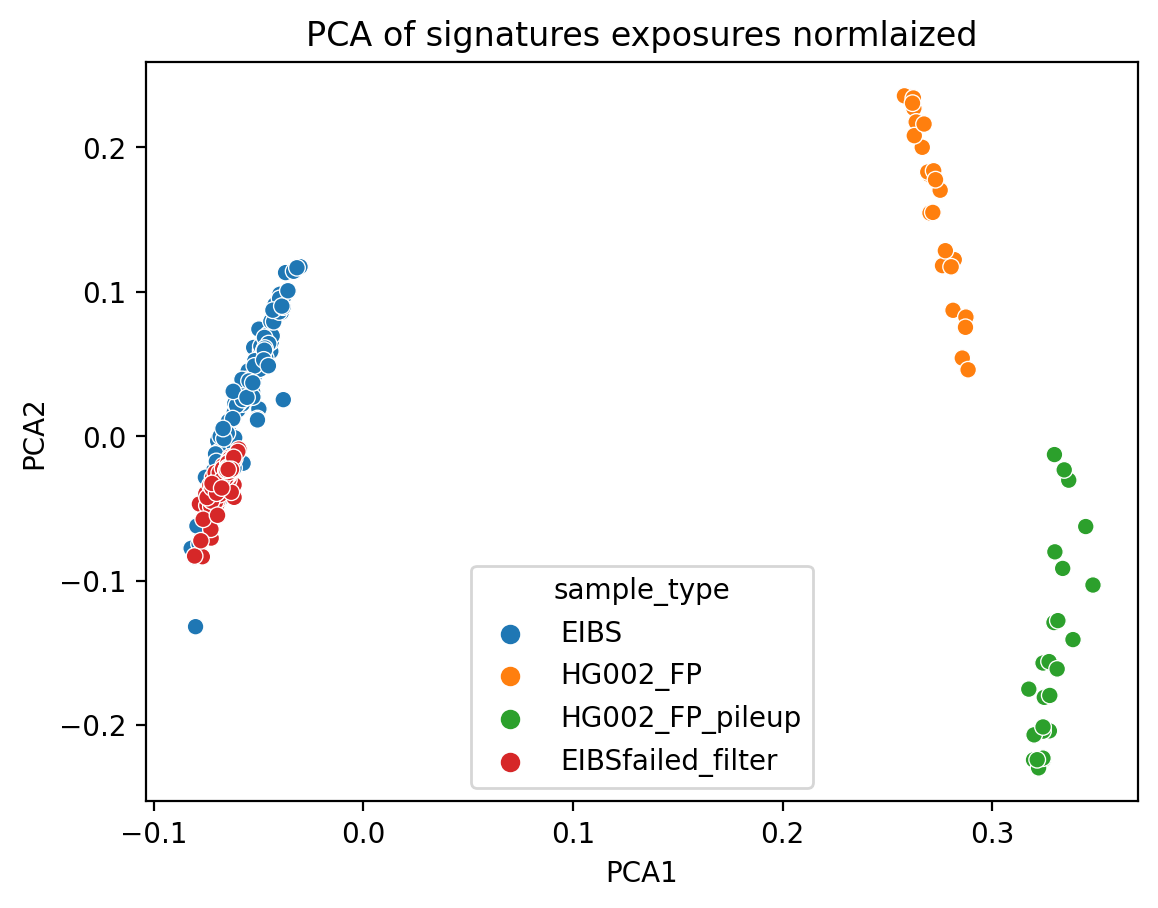

In [291]:
exposures_pca = exposures_norm_all_groups.copy(deep=True)
pca = PCA(n_components=2)
components = pca.fit_transform(exposures_pca)
print(pca.explained_variance_ratio_)
exposures_pca['PCA1'] = components[:,0]
exposures_pca['PCA2'] = components[:, 1]
exposures_pca['ID'] = exposures_pca.index
suffix = ['failed_filter' if s.endswith('failed_filter') else "" for s in exposures_pca.ID]
exposures_pca['sample_type'] = exposures_pca.ID.str.rsplit('-', expand=True)[0] + suffix
sns.scatterplot(data=exposures_pca, x='PCA1', y='PCA2', hue='sample_type')
plt.title('PCA of signatures exposures normlaized')

[0.6534755 0.2972969]


Text(0.5, 1.0, 'PCA of signatures exposures raw counts')

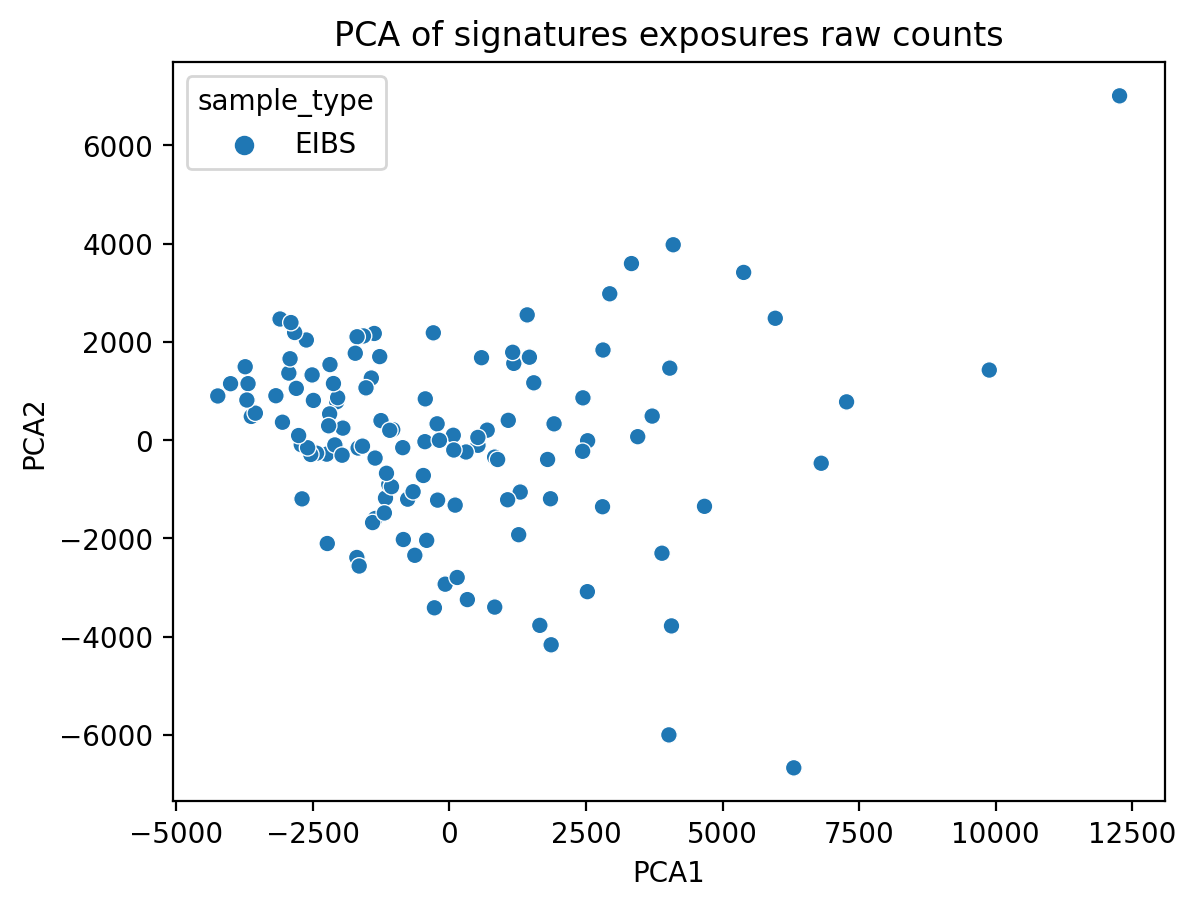

In [292]:
exposures_pca = patient_exposures.copy(deep=True)
pca = PCA(n_components=2)
components = pca.fit_transform(exposures_pca)
print(pca.explained_variance_ratio_)
exposures_pca['PCA1'] = components[:,0]
exposures_pca['PCA2'] = components[:, 1]
exposures_pca['ID'] = exposures_pca.index
suffix = ['failed_filter' if s.endswith('failed_filter') else "" for s in exposures_pca.ID]
exposures_pca['sample_type'] = exposures_pca.ID.str.rsplit('-', expand=True)[0] + suffix
sns.scatterplot(data=exposures_pca, x='PCA1', y='PCA2', hue='sample_type')
plt.title('PCA of signatures exposures raw counts')

[0.86704355 0.04525892]


Text(0.5, 1.0, 'PCA of signatures exposures normalized')

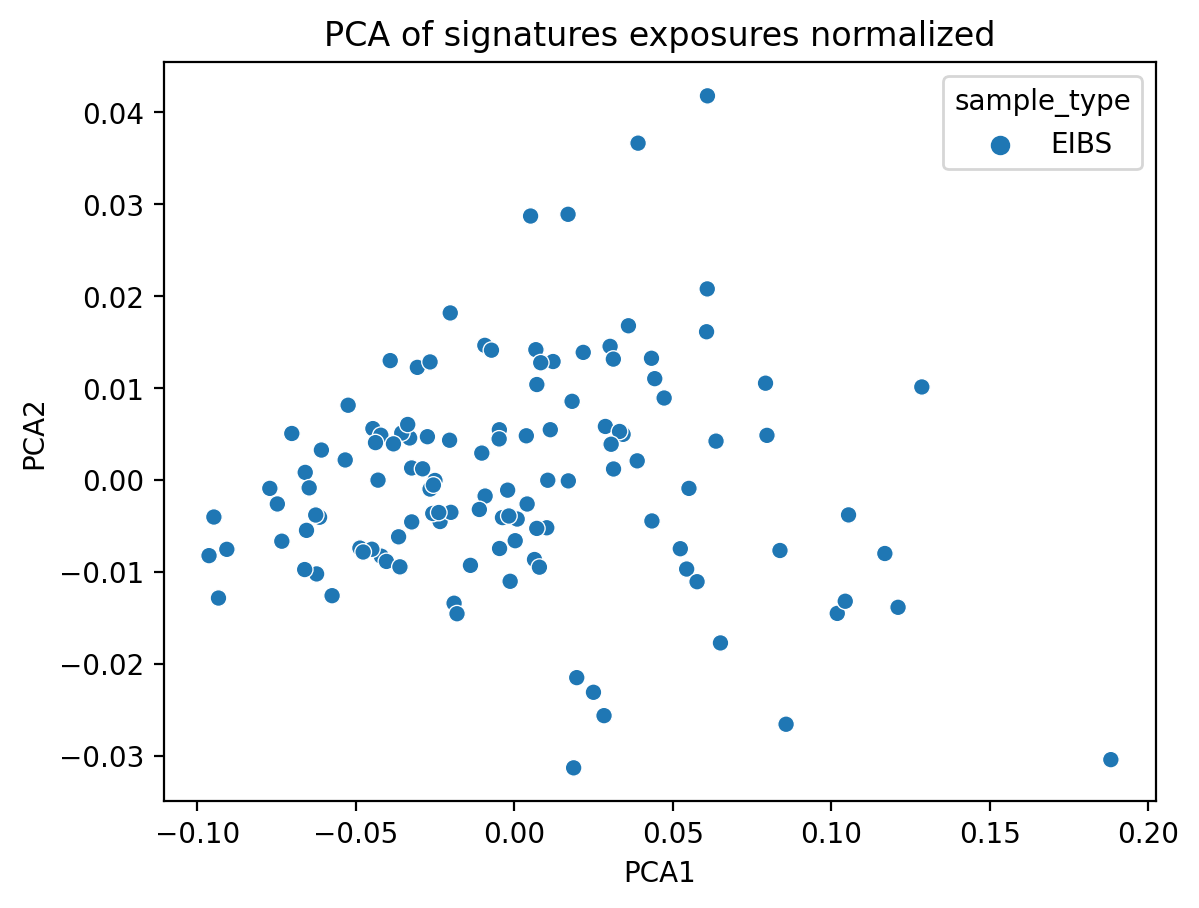

In [294]:
exposures_pca = patient_norm_exposures.copy(deep=True)
pca = PCA(n_components=2)
components = pca.fit_transform(exposures_pca)
print(pca.explained_variance_ratio_)
exposures_pca['PCA1'] = components[:,0]
exposures_pca['PCA2'] = components[:, 1]
exposures_pca['ID'] = exposures_pca.index
suffix = ['failed_filter' if s.endswith('failed_filter') else "" for s in exposures_pca.ID]
exposures_pca['sample_type'] = exposures_pca.ID.str.rsplit('-', expand=True)[0] + suffix
sns.scatterplot(data=exposures_pca, x='PCA1', y='PCA2', hue='sample_type')
plt.title('PCA of signatures exposures normalized')

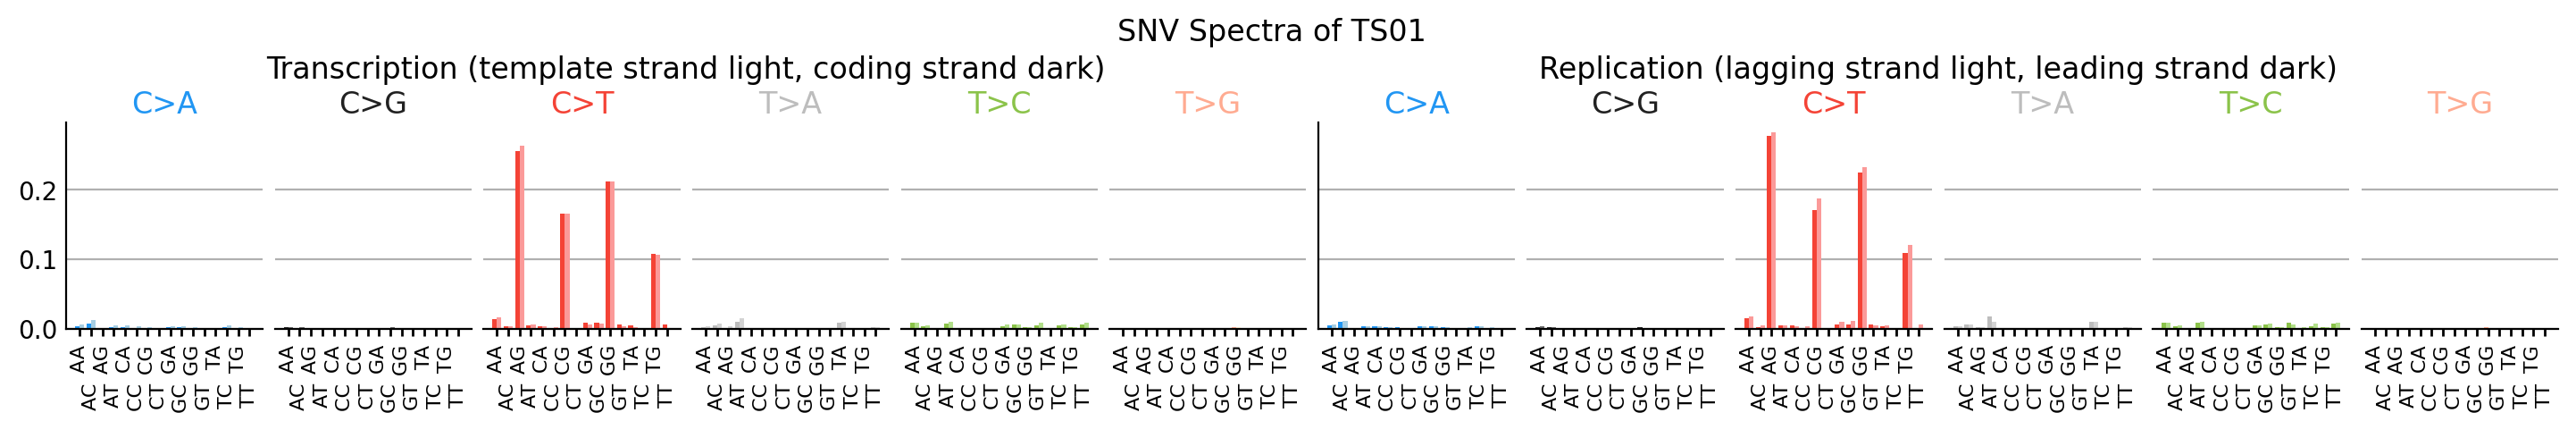

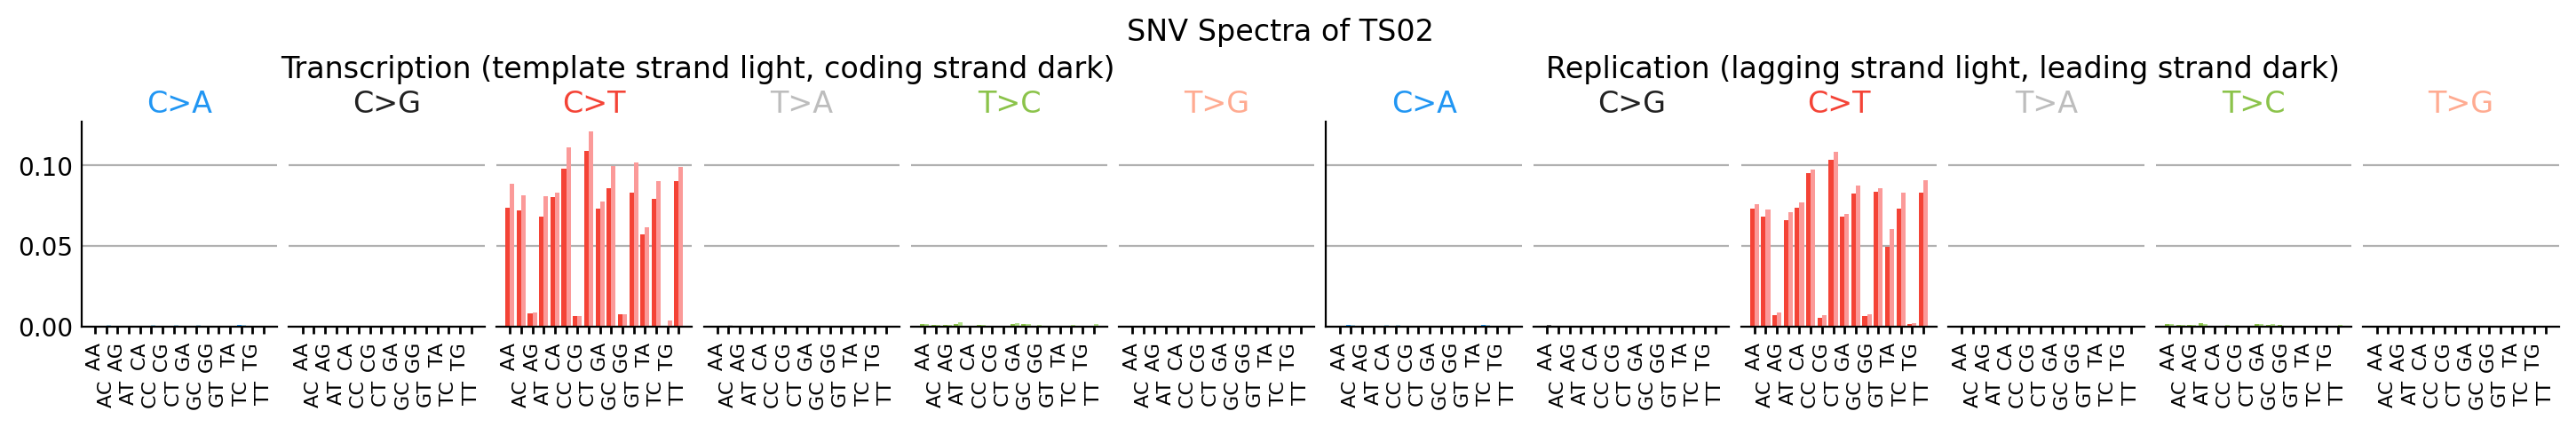

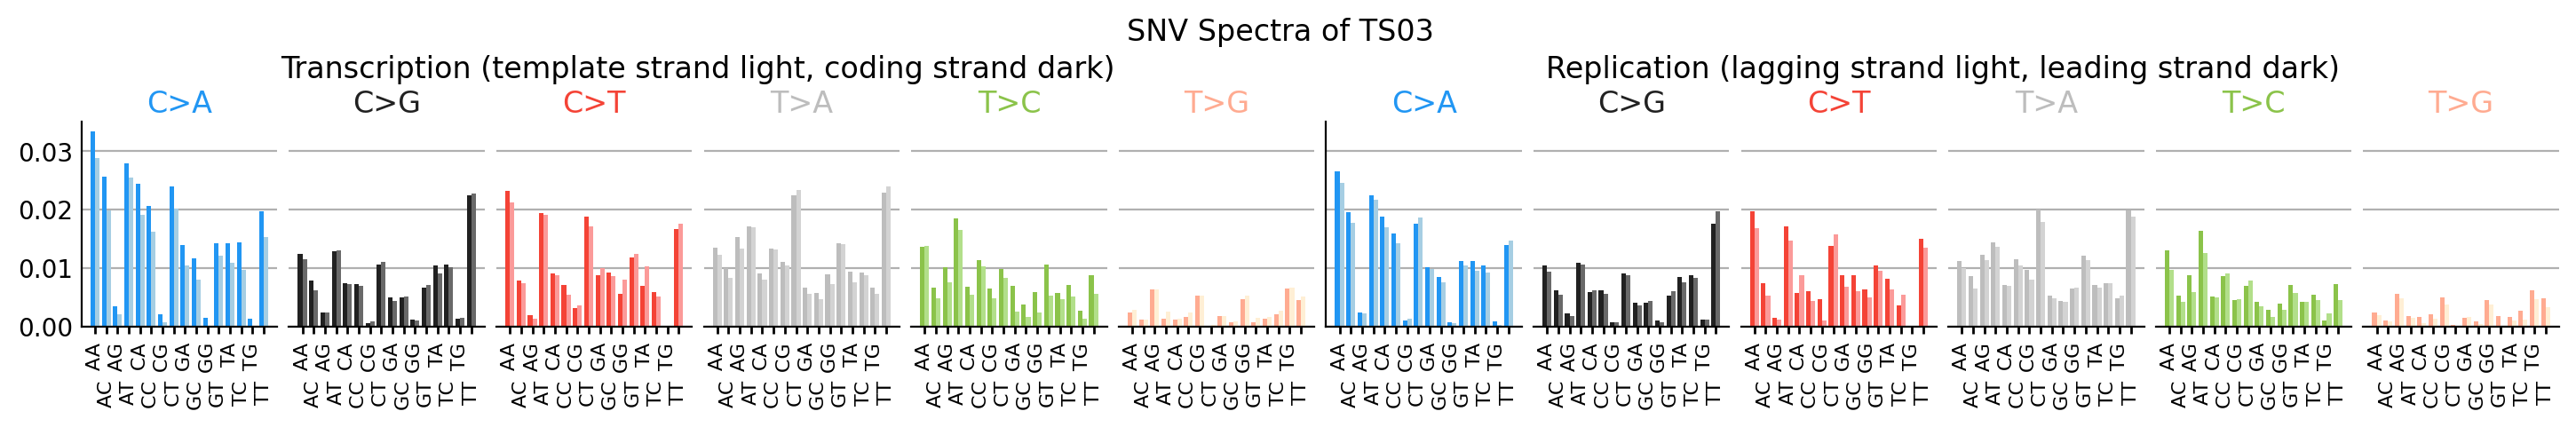

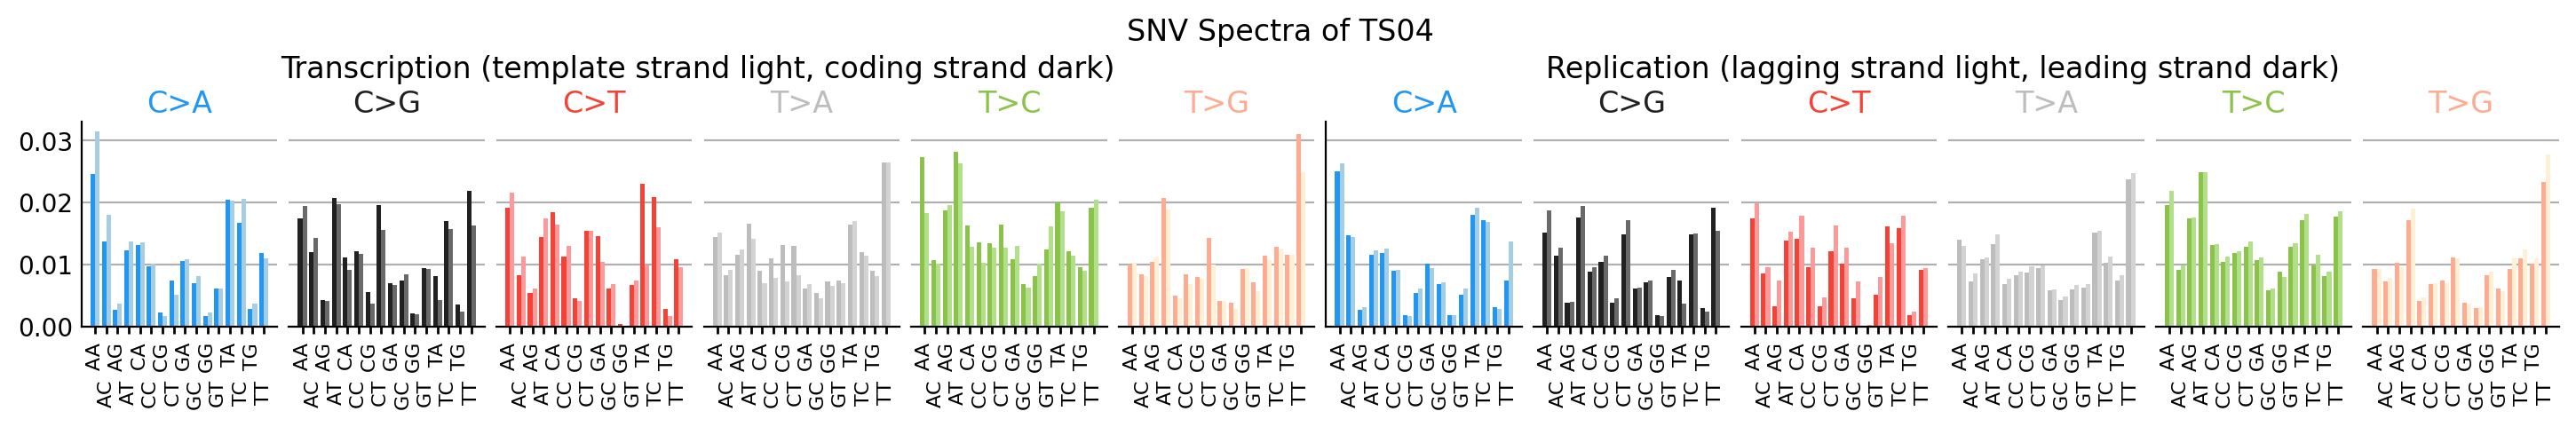

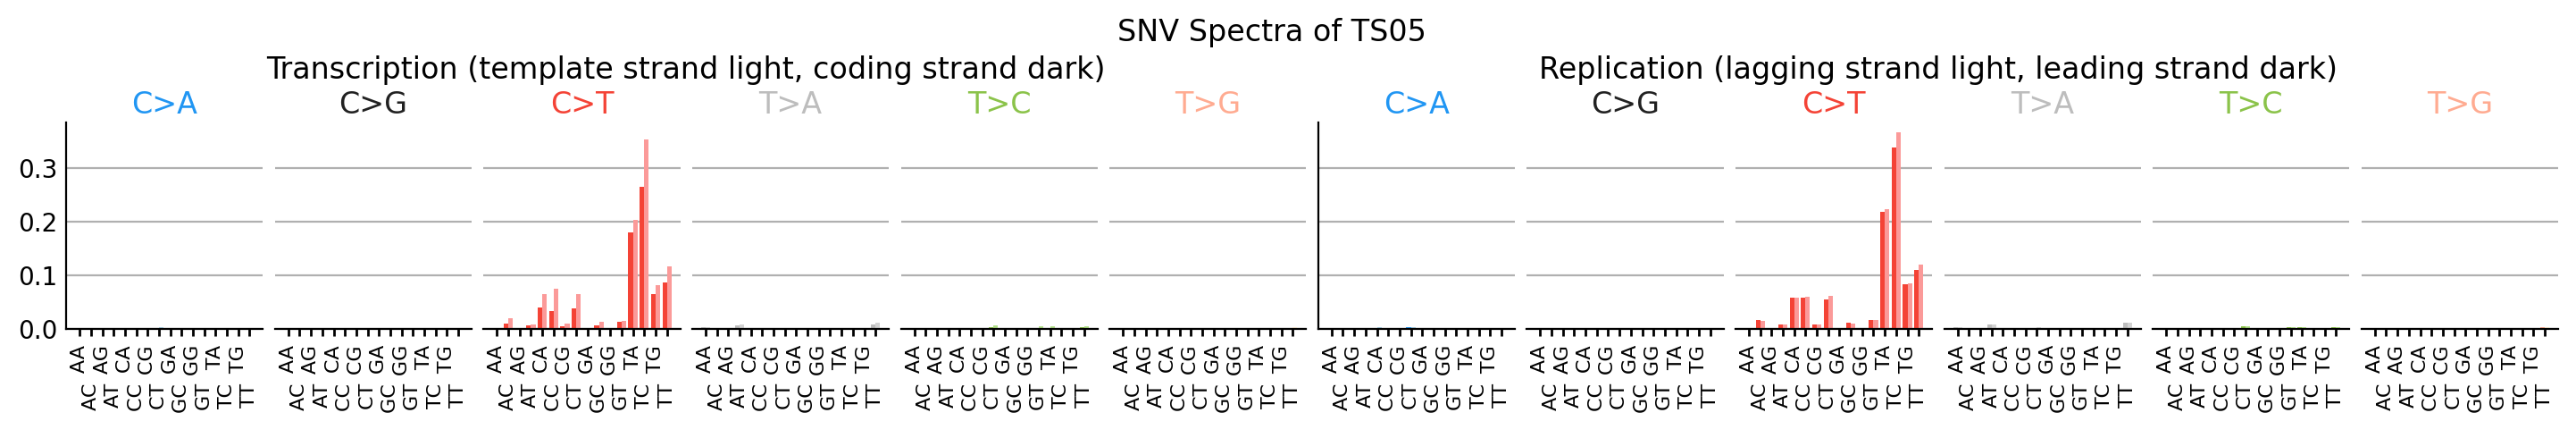

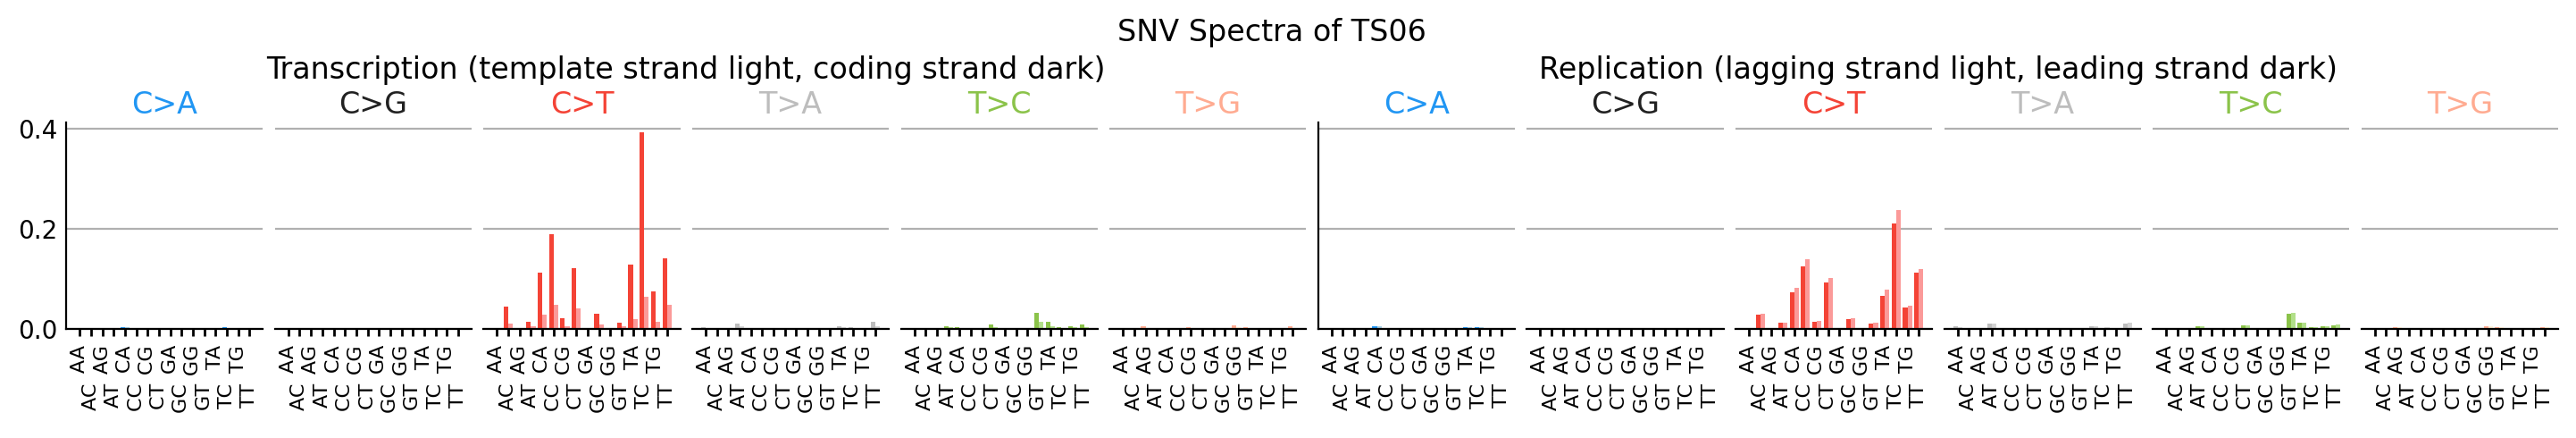

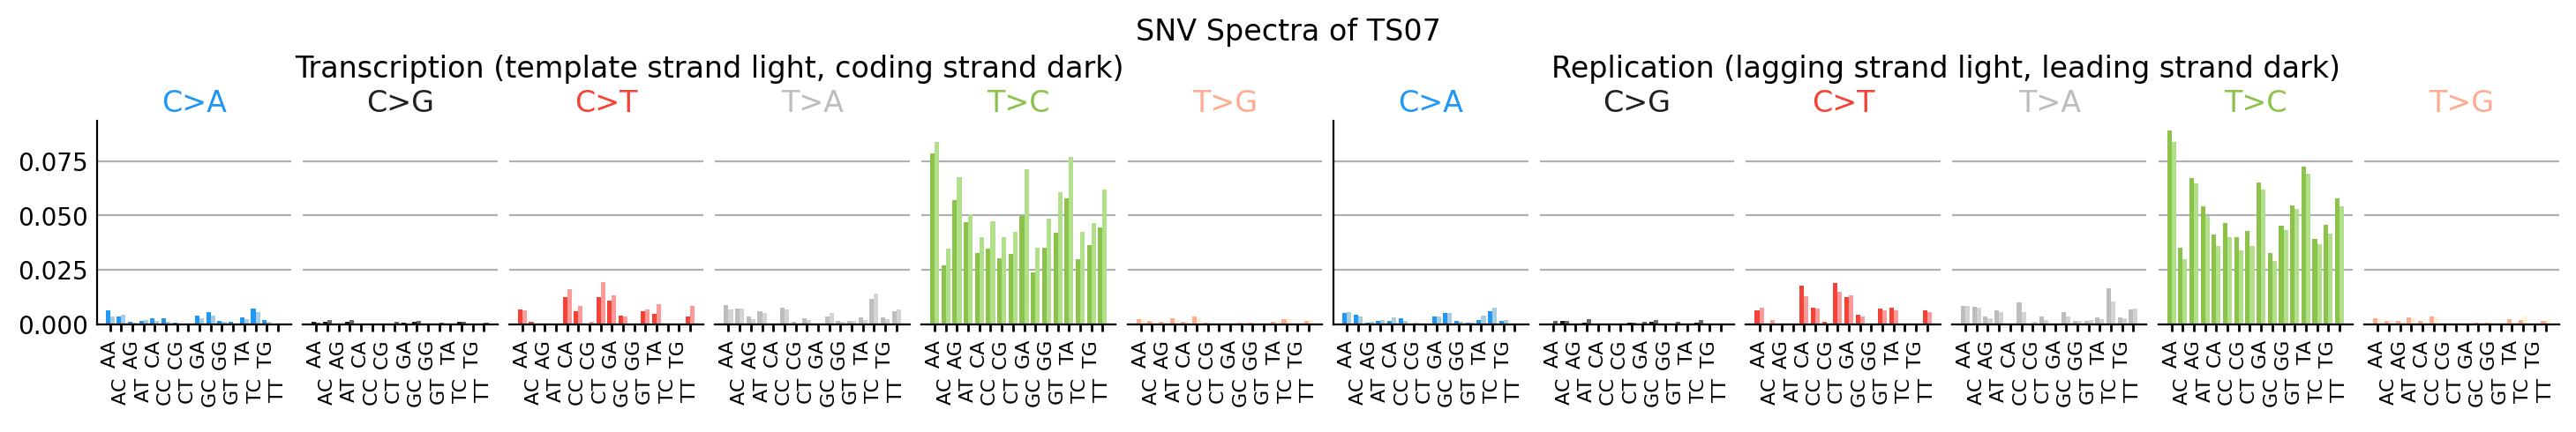

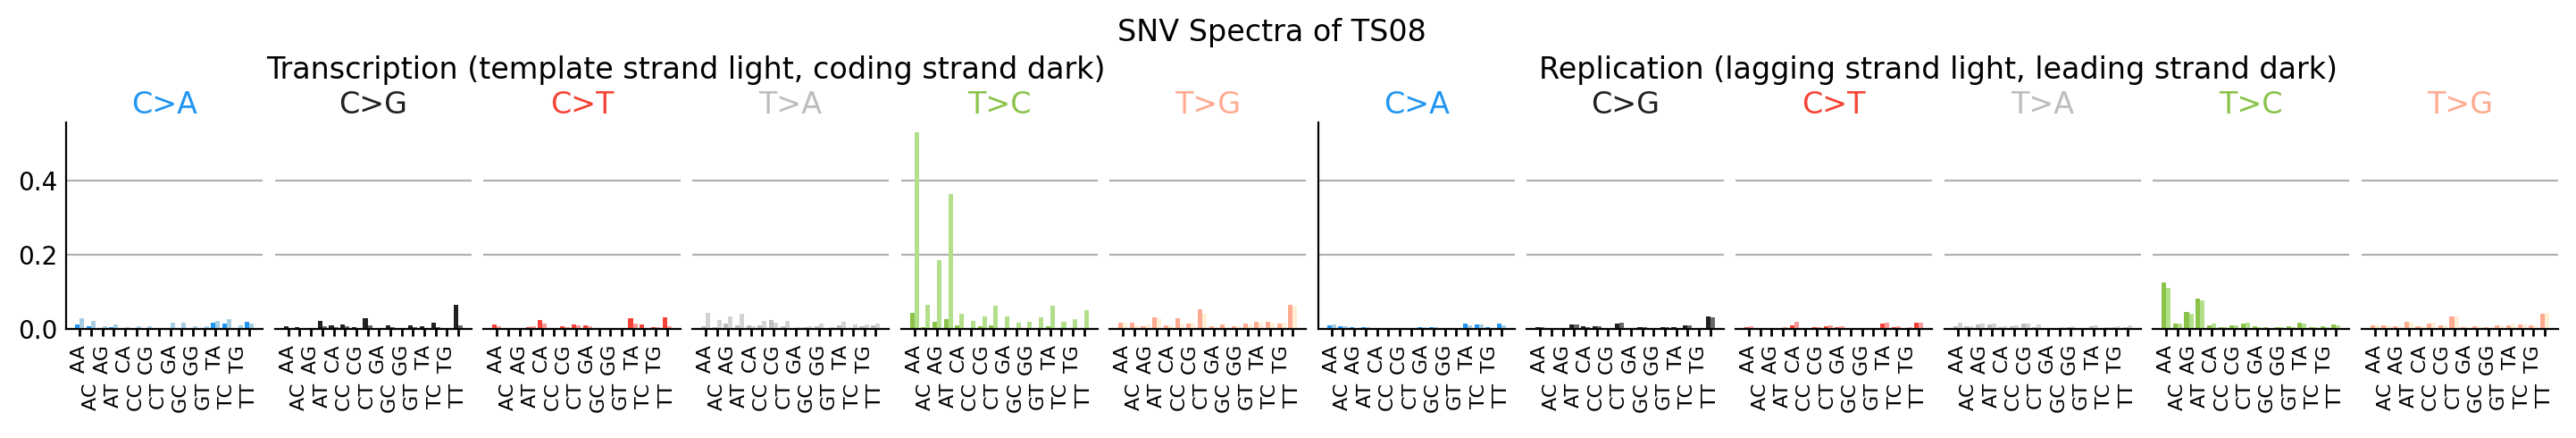

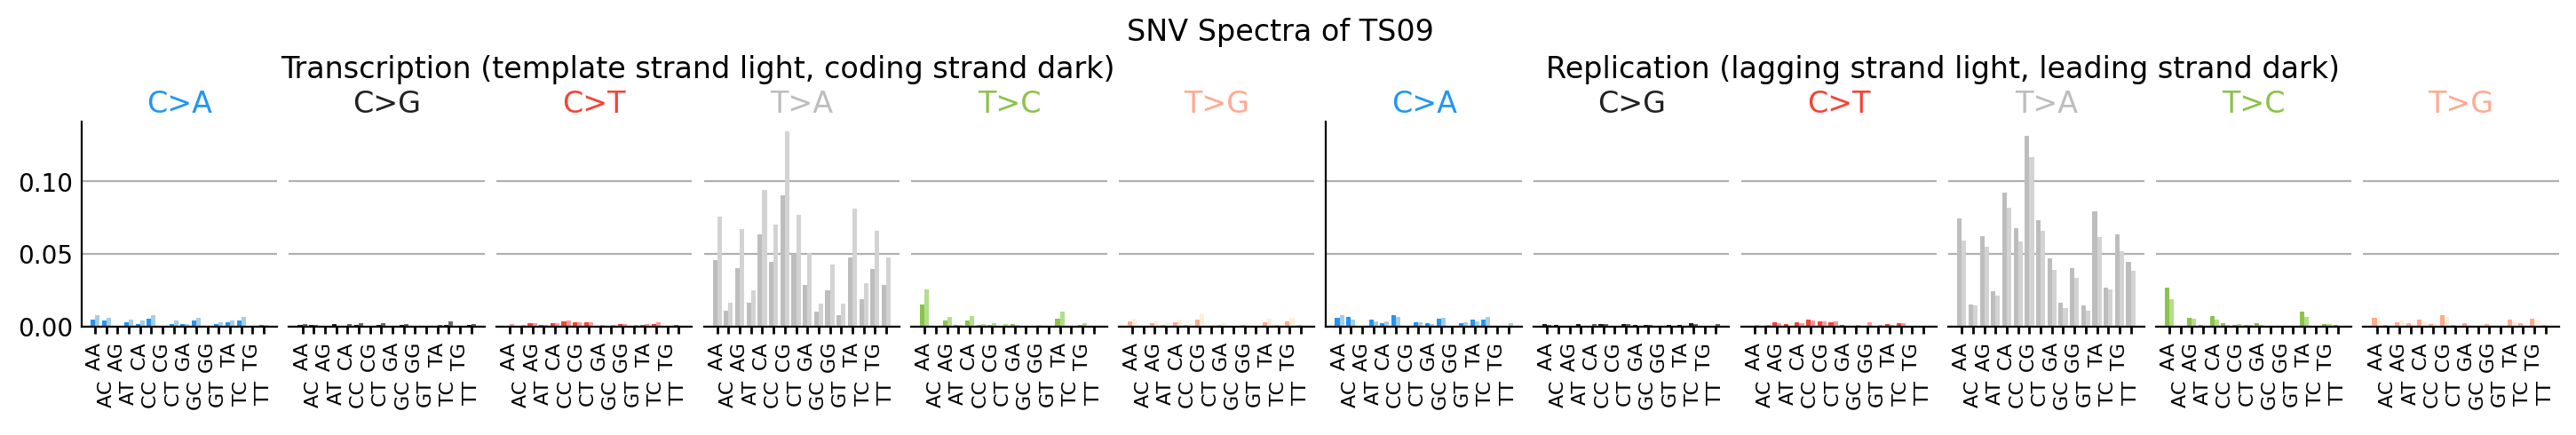

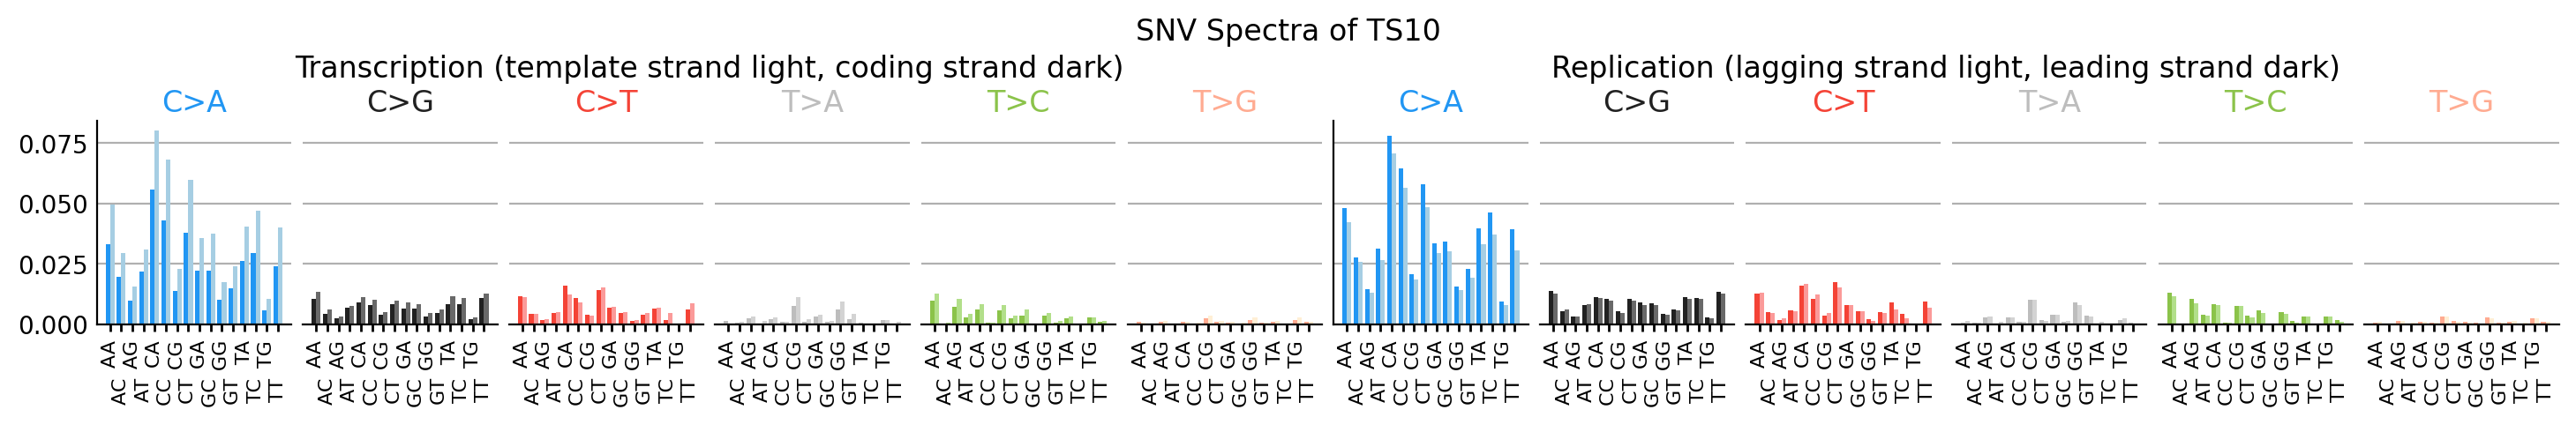

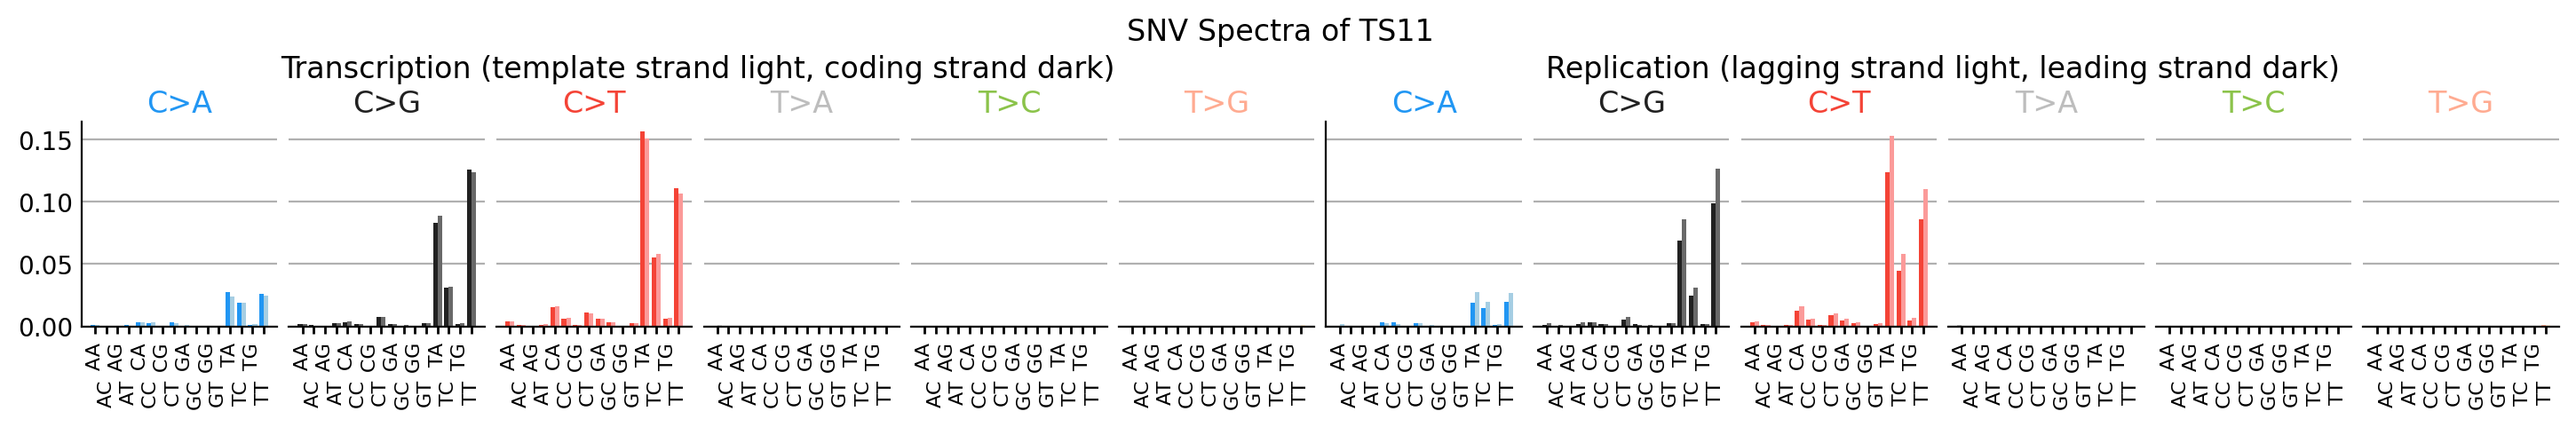

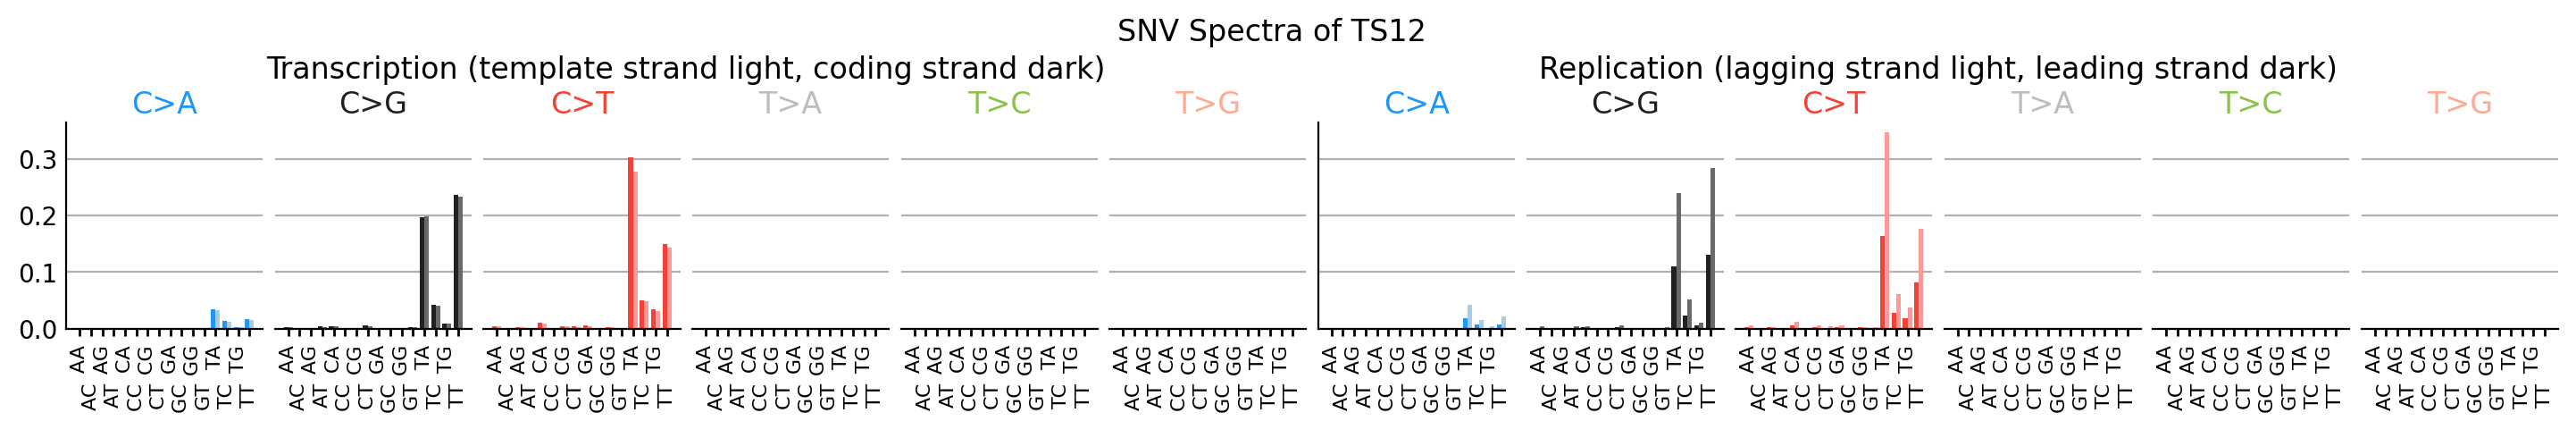

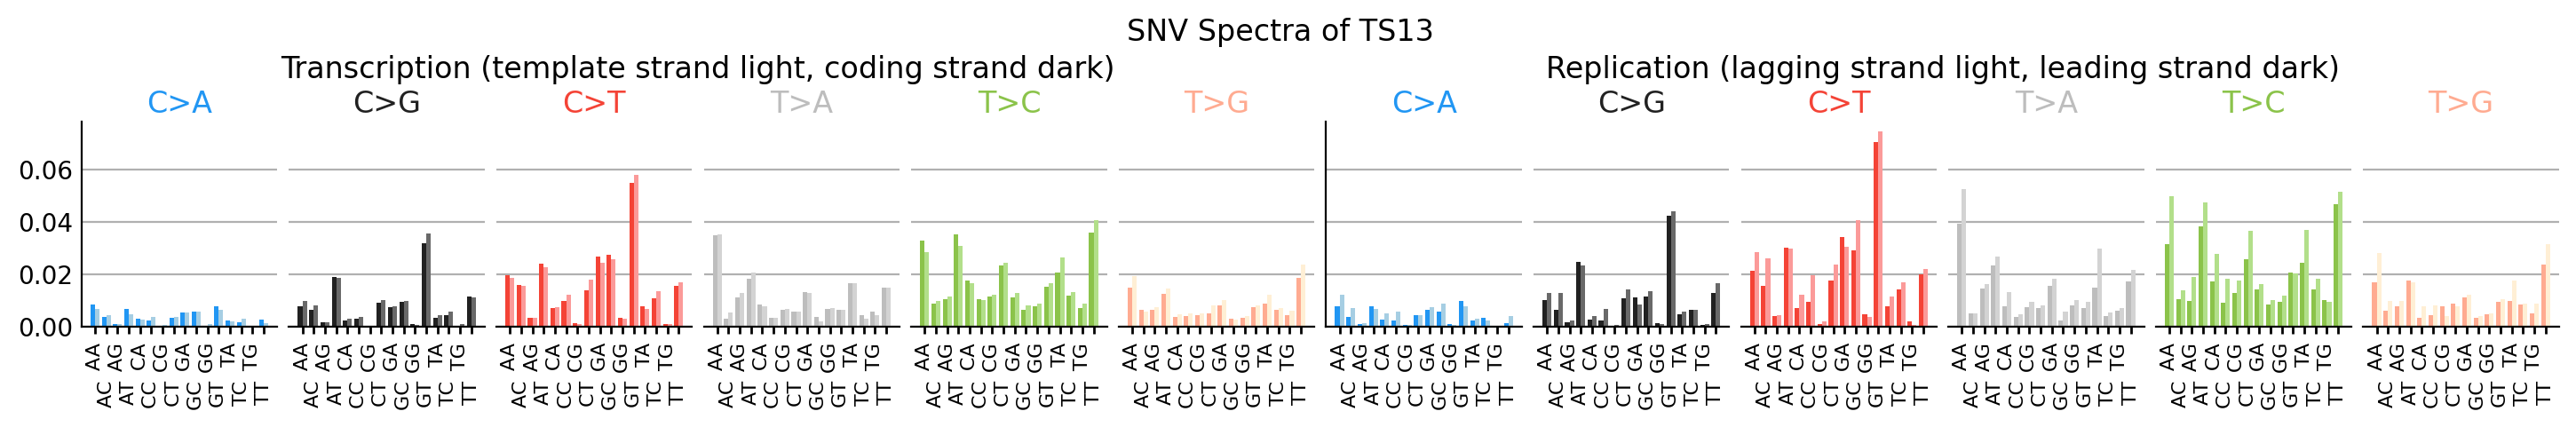

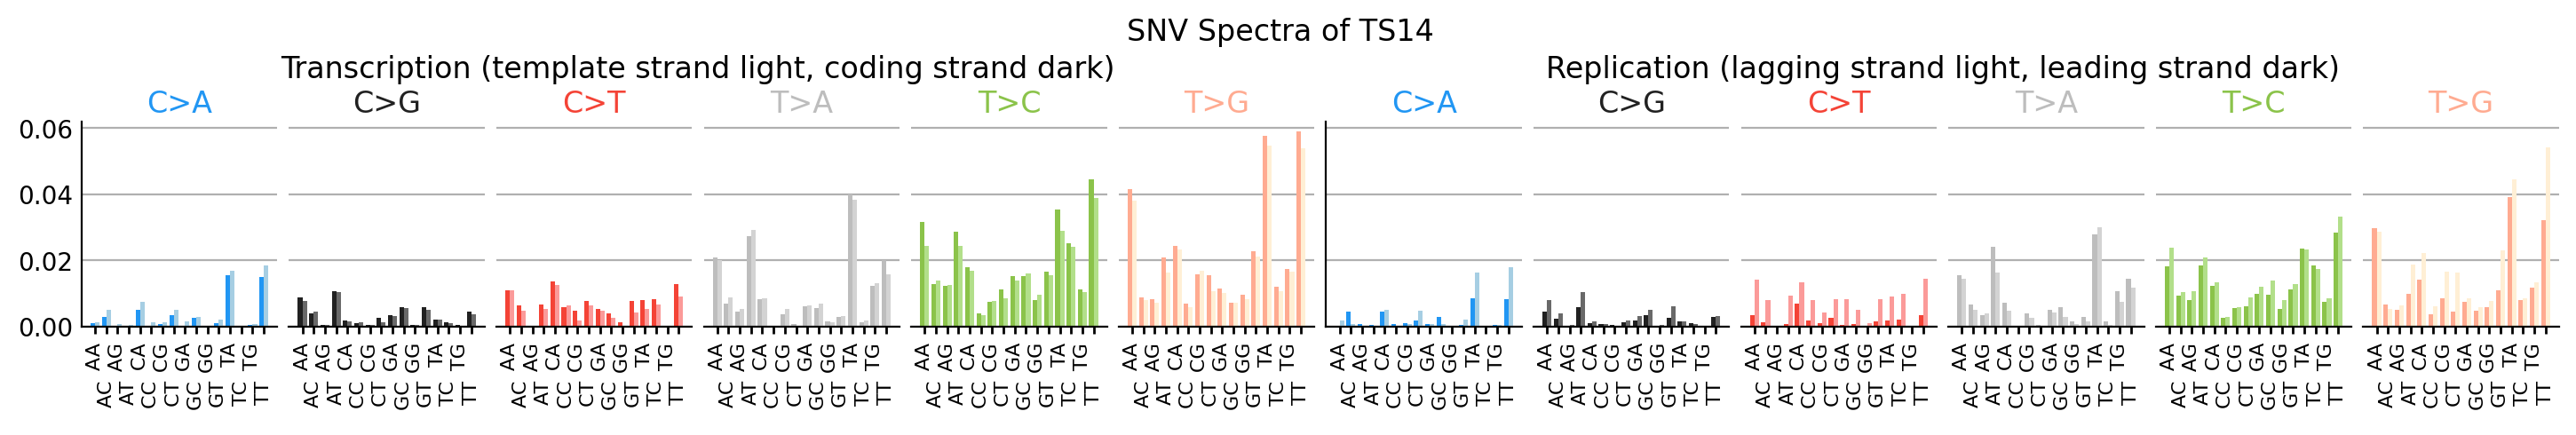

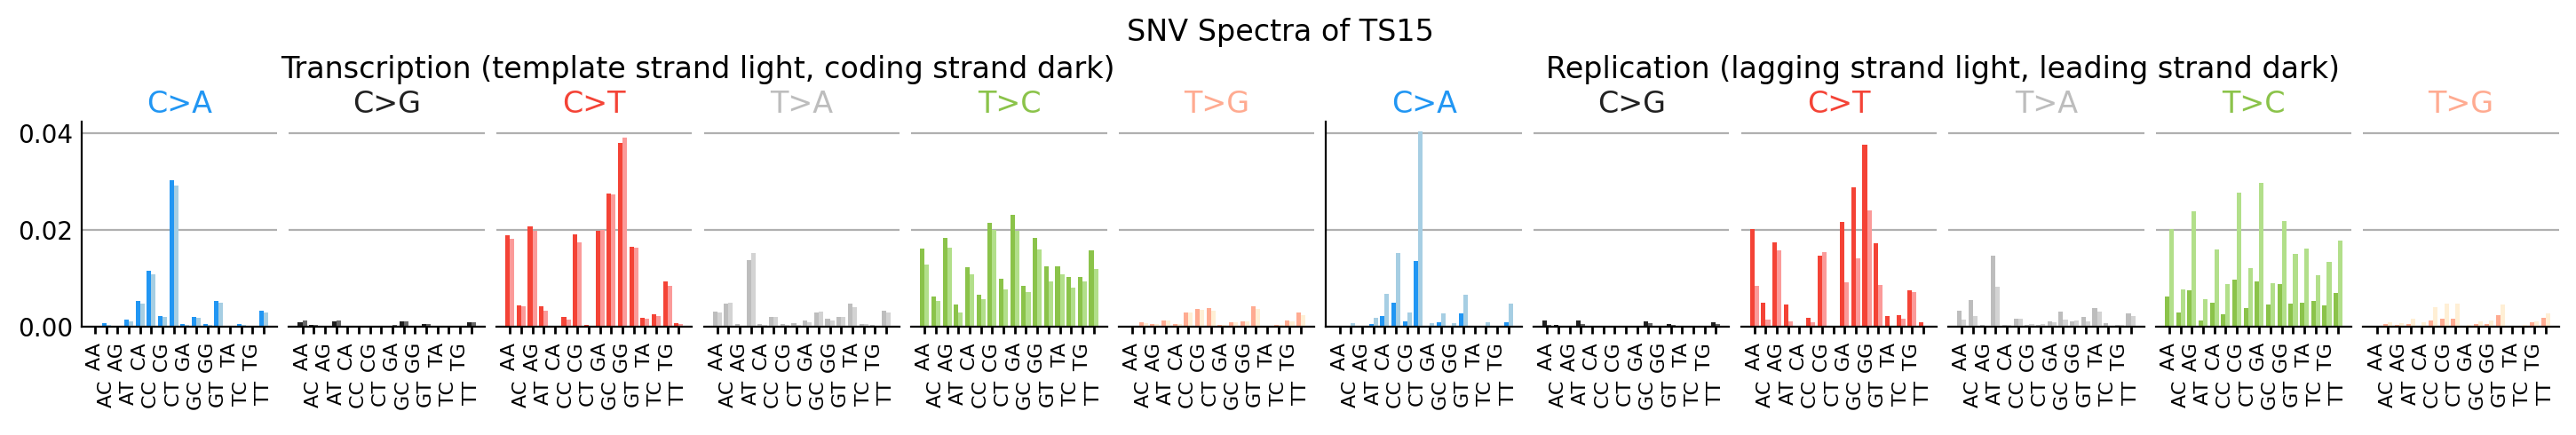

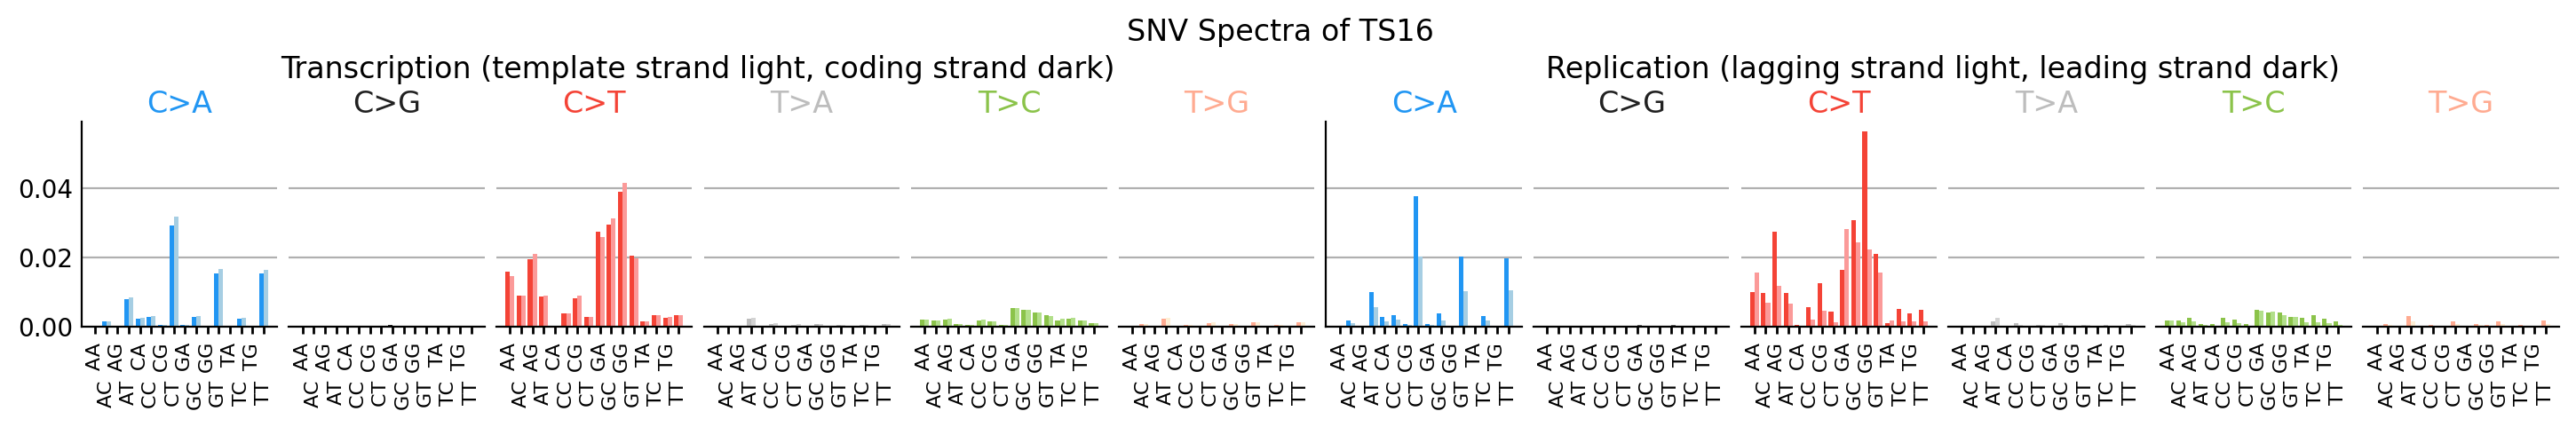

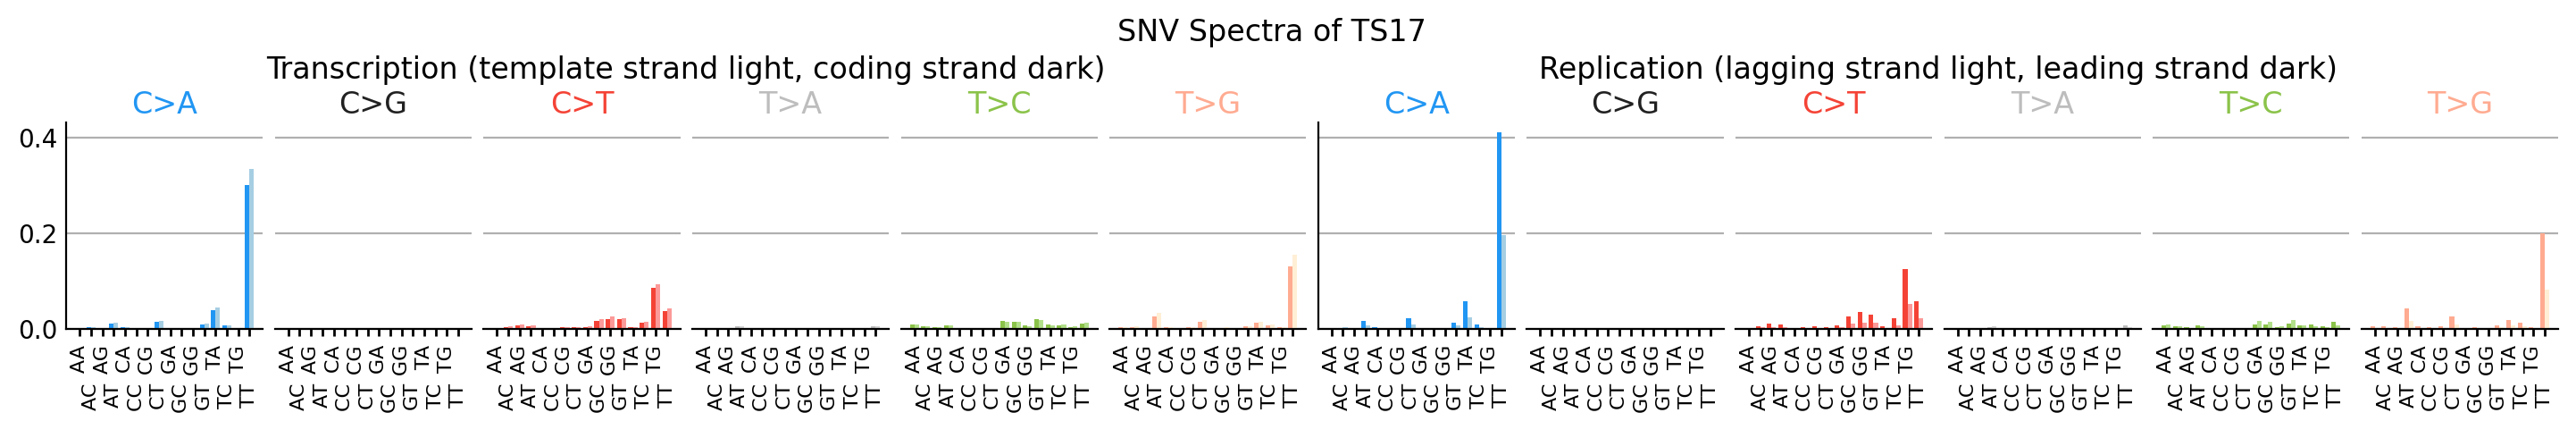

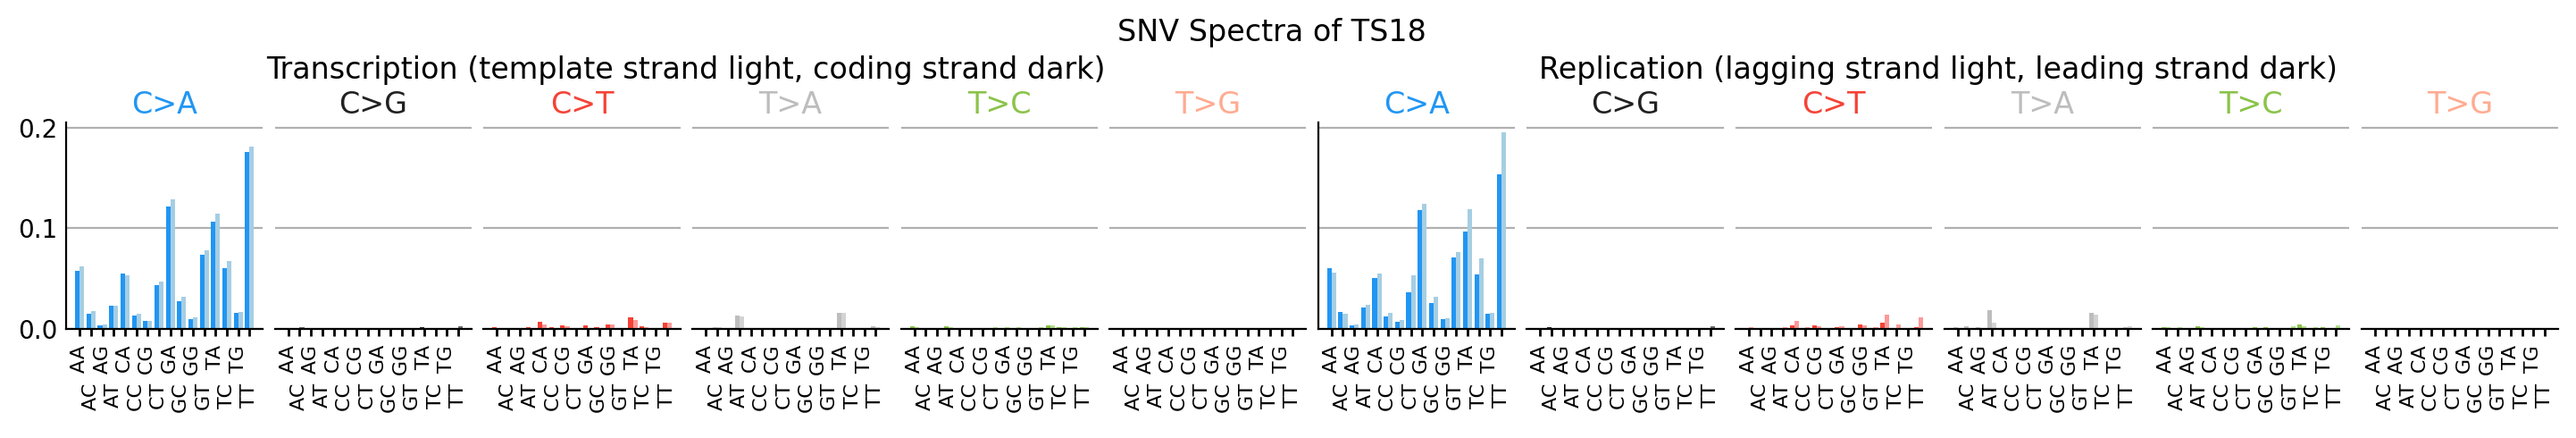

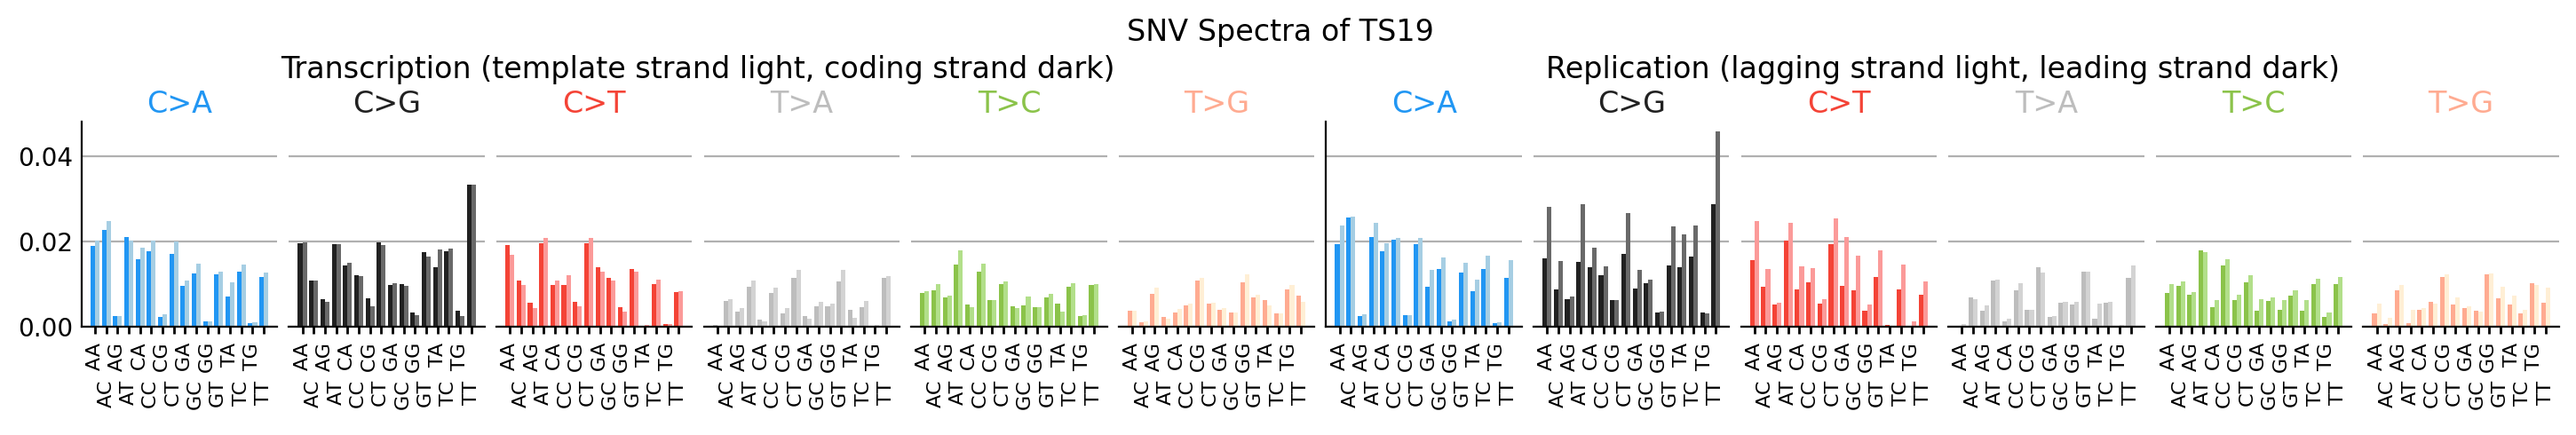

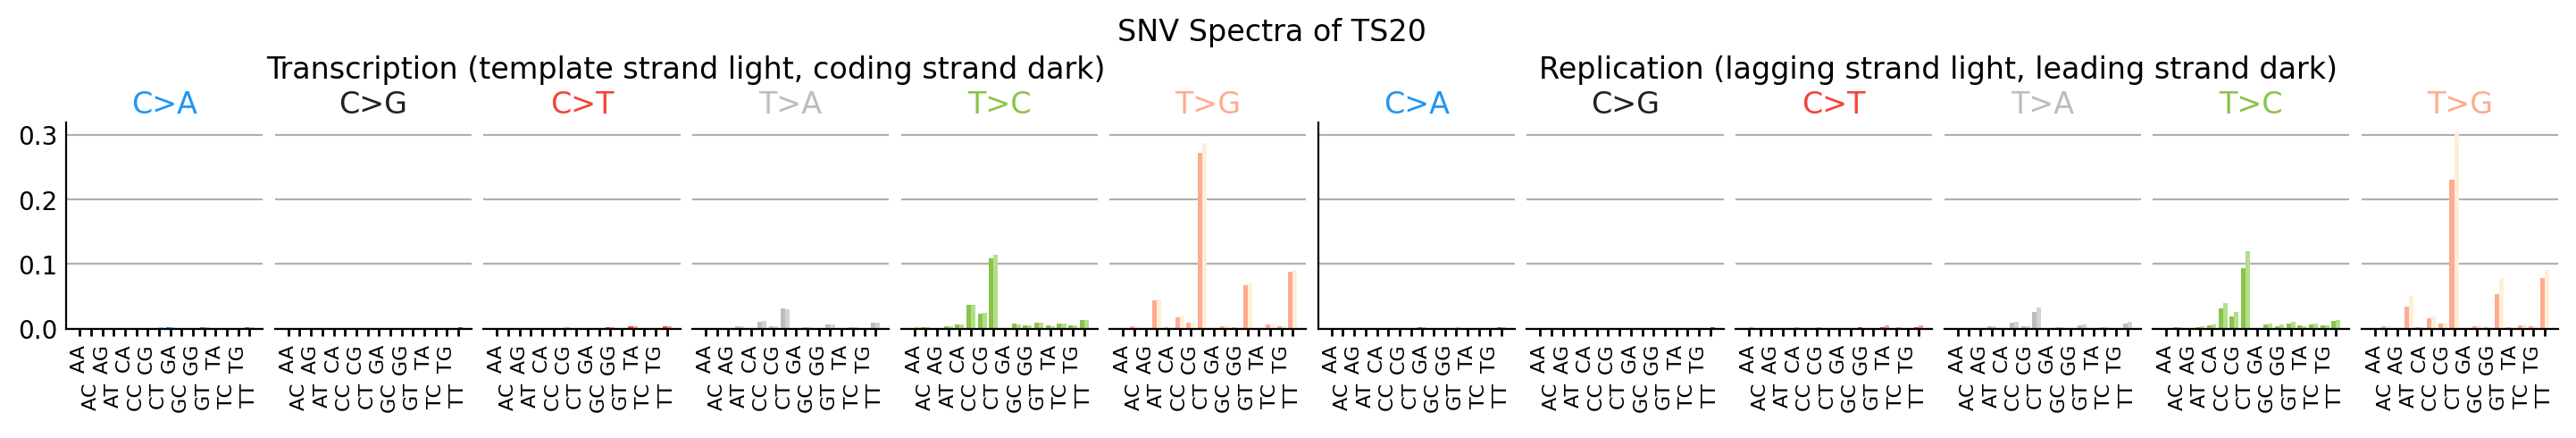

In [295]:
refit_path = '/home/xchen@okta-oci.eitm.org/projects/tensorsignatures/refit_state002_029.pkl'
init = ts.load_dump(refit_path)
for u in range(init.rank):
    plt.figure(figsize=(18,2))
    ts.plot_signature(init.S.reshape(3, 3, -1, 96, init.rank), u)
    plt.suptitle(f'SNV Spectra of TS{u+1:02}')
    plt.show()

(<matplotlib.image.AxesImage at 0x7f102a3173a0>,
 <matplotlib.colorbar.Colorbar at 0x7f102a5ac040>)

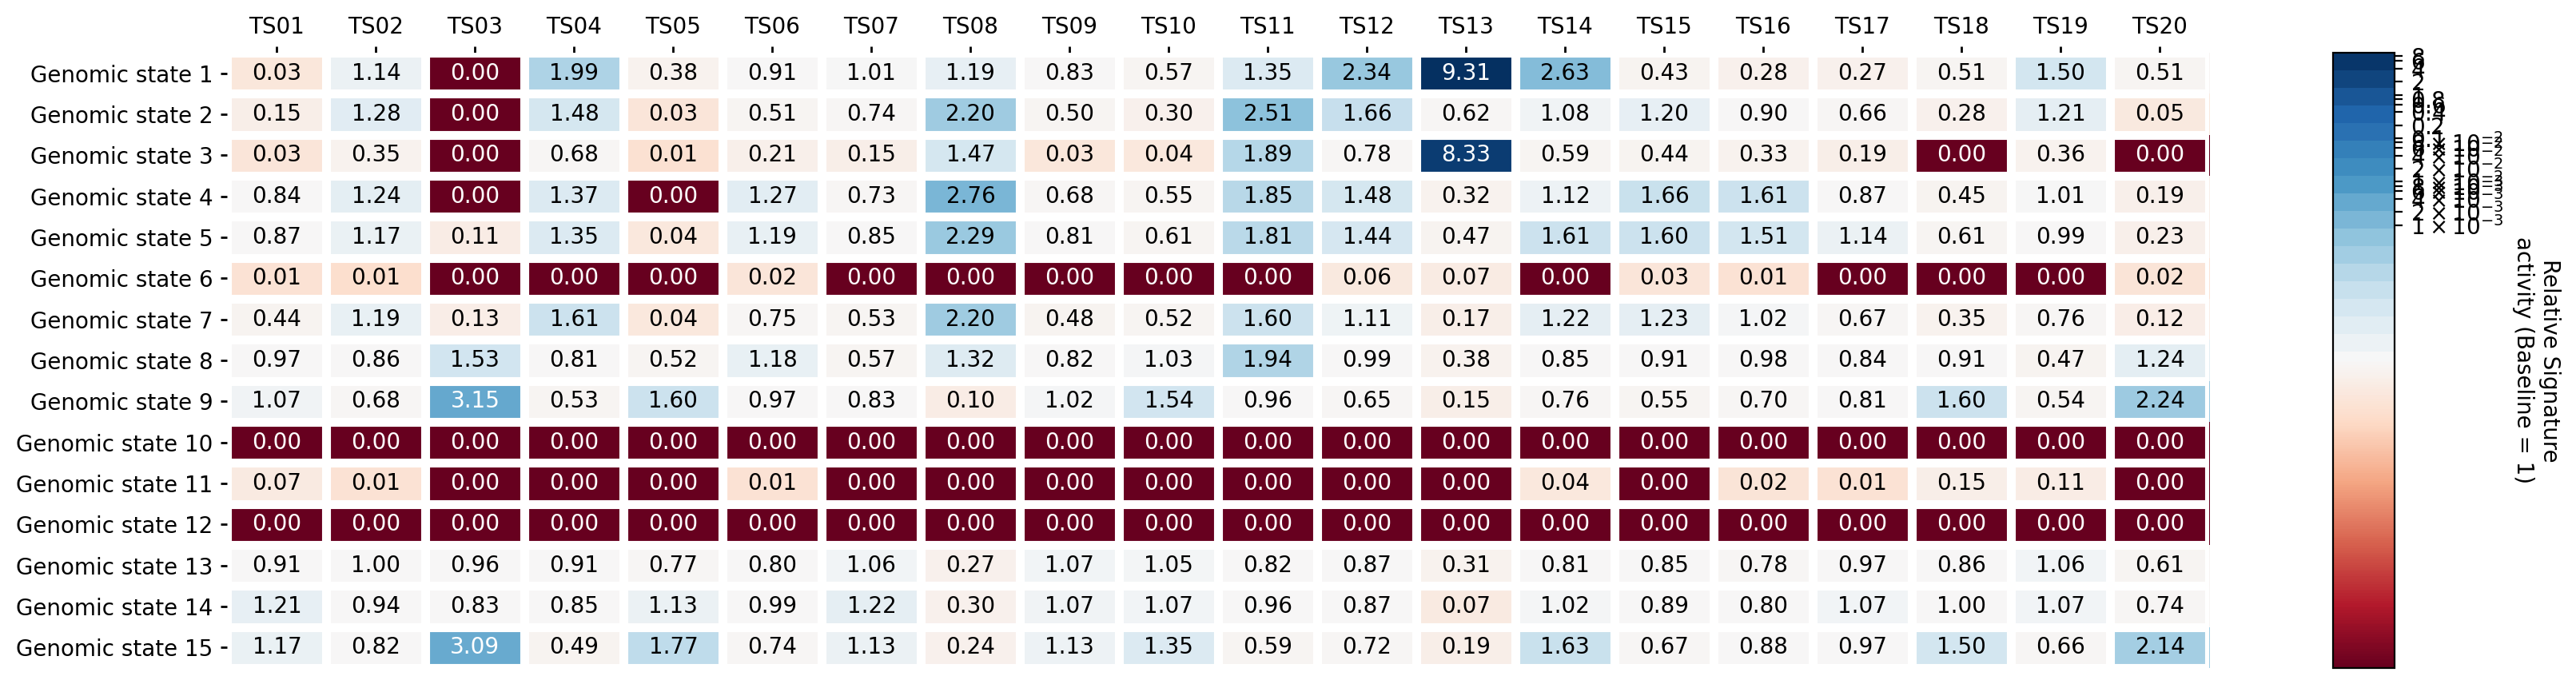

In [308]:
plt.figure(figsize=(20,5))
ts.heatmap(init.k0,
           row_labels=[f'Genomic state {i+1}' for i in range(init.k0.shape[0])],
           col_labels=[f'TS{i+1:02}' for i in range(20)],
           cbarlabel='Relative Signature\nactivity (Baseline = 1)' # color bar label
          )

(<matplotlib.image.AxesImage at 0x7f10382040a0>,
 <matplotlib.colorbar.Colorbar at 0x7f1035773fd0>)

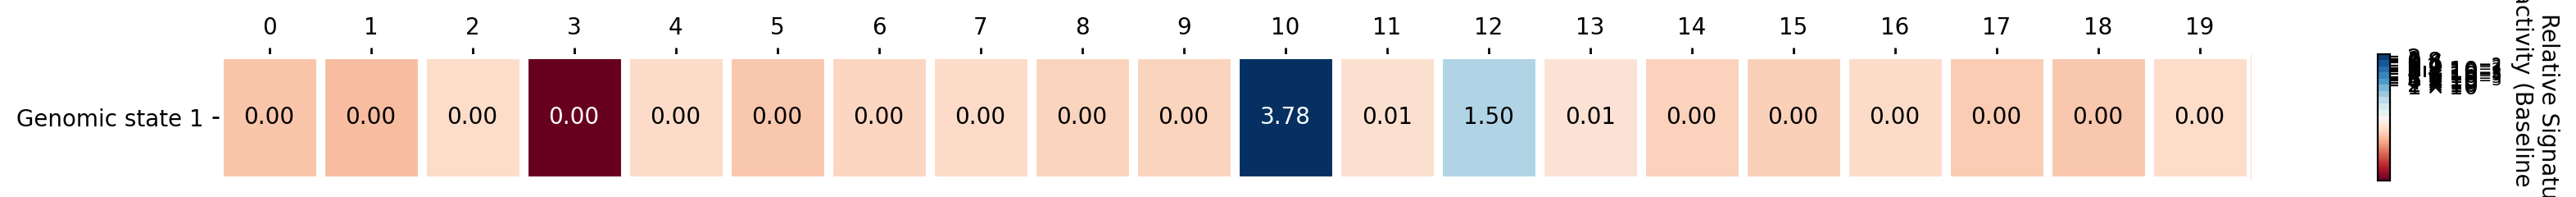

In [297]:
plt.figure(figsize=(20,1))
ts.heatmap(init.k2,
           row_labels=['Genomic state 1', ],
           col_labels=['{}'.format(i) for i in range(20)],
           cbarlabel='Relative Signature\nactivity (Baseline = 1)' # color bar label
          )

(<matplotlib.image.AxesImage at 0x7f10427274f0>,
 <matplotlib.colorbar.Colorbar at 0x7f1042727160>)

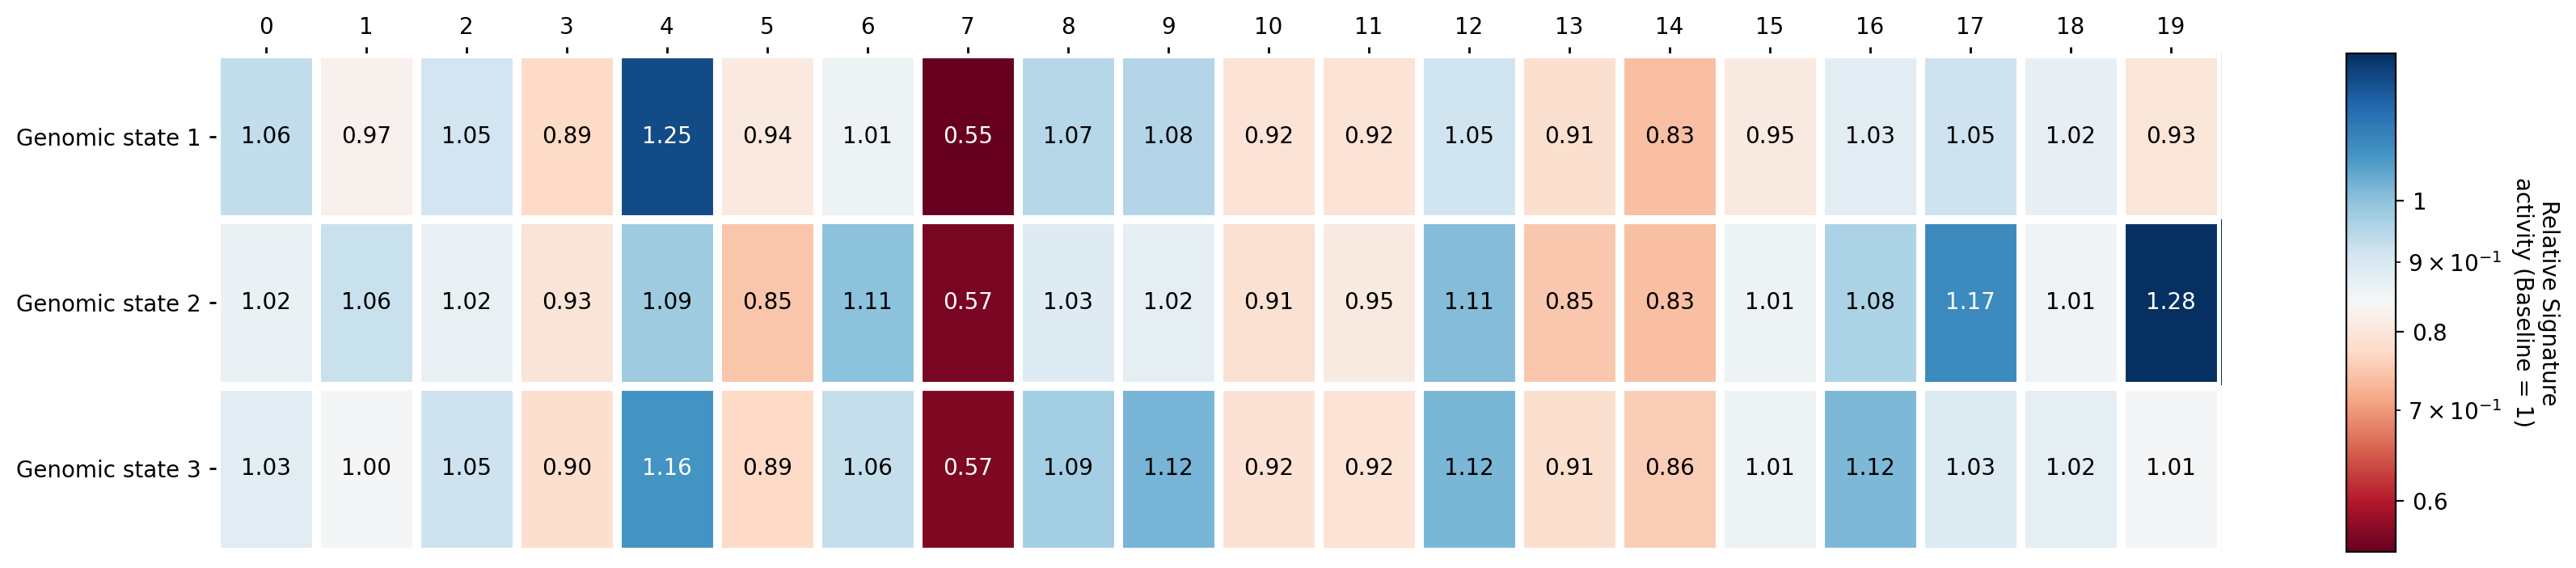

In [296]:
plt.figure(figsize=(20,4))
ts.heatmap(init.k1,
           row_labels=['Genomic state 1', 'Genomic state 2', 'Genomic state 3', ],
           col_labels=['{}'.format(i) for i in range(20)],
           cbarlabel='Relative Signature\nactivity (Baseline = 1)' # color bar label
          )

(<matplotlib.image.AxesImage at 0x7f1045209e10>,
 <matplotlib.colorbar.Colorbar at 0x7f1045209b10>)

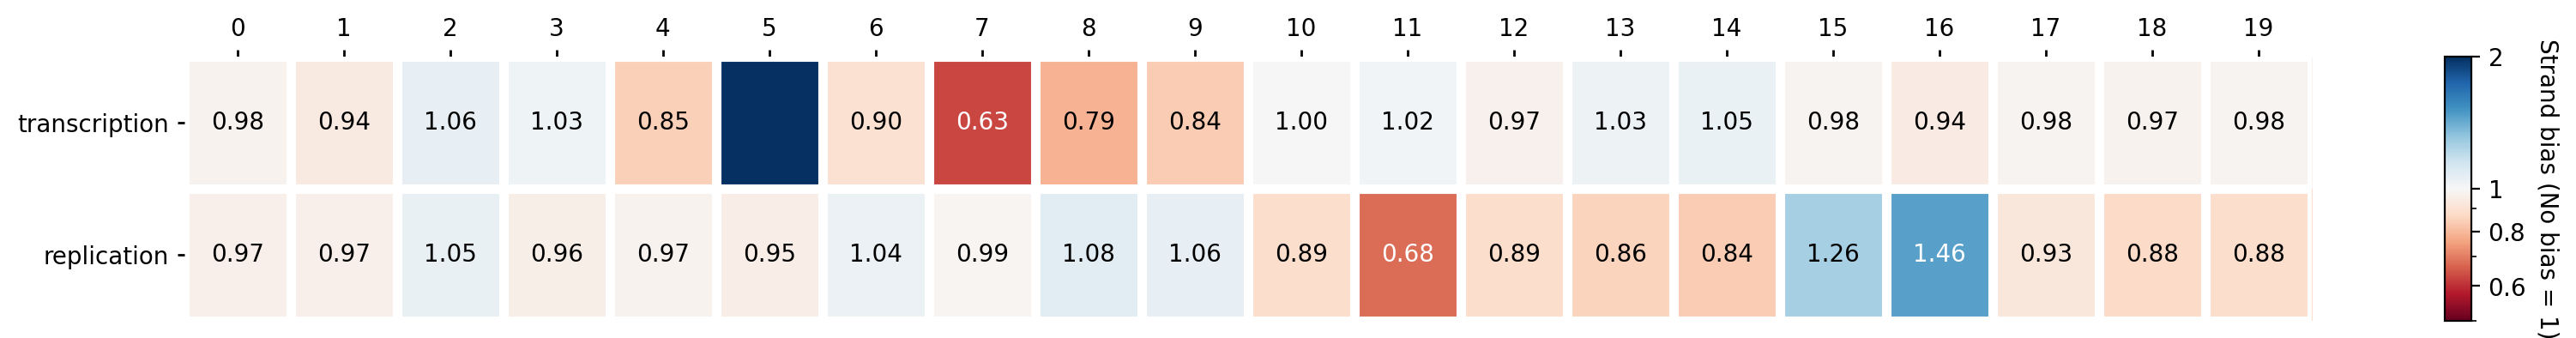

In [310]:
plt.figure(figsize=(20,2))
ts.heatmap(
   init.b,
   vmin=.5, vmax=2, # allows to specify the limits of the colorbar
   row_labels=["transcription", "replication"],
   cbarlabel="Strand bias (No bias = 1)") # color bar label